# Output

## Variant media condtion

### config.pq under configuration

In [5]:
path0 = "/user/home/il22158/work/vEcoli/out/all_media_conditions1/configuration/experiment_id=all_media_conditions1/variant=0/lineage_seed=0/generation=1/agent_id=0"

import pandas as pd

# Or read all parquet files from a directory
df0 = pd.read_parquet(f"{path0}/config.pq")
print(df0)

  inherit_from          experiment_id  suffix_time description  progress_bar  \
0           []  all_media_conditions1        False                      True   

  sim_data_path  emitter           emitter_arg__out_dir  emit_topology  \
0     0.cPickle  parquet  /user/work/il22158/vEcoli/out          False   

   emit_processes  ...  \
0           False  ...   

   output_metadata__listeners__rna_synth_prob__expected_rna_init_per_cistron  \
0  [EG10001, EG10002, EG10003, EG10004, EG10006, ...                           

   output_metadata__listeners__rna_synth_prob__n_bound_TF_per_cistron  \
0  [EG10001, EG10002, EG10003, EG10004, EG10006, ...                    

   output_metadata__listeners__transcript_elongation_listener__count_rna_synthesized  \
0  [TU-8381[c], TU-8382[c], TU-8383[c], TU-8384[c...                                   

   output_metadata__listeners__transcript_elongation_listener__attenuation_probability  \
0  [TU0-14257[c], TU0-14764[c], TU0-198747[c], TU...          

### s.pq under suceess

In [7]:
path1 = "/user/home/il22158/work/vEcoli/out/all_media_conditions1/success/experiment_id=all_media_conditions1/variant=0/lineage_seed=0/generation=1/agent_id=0"

import pandas as pd

# Or read all parquet files from a directory
df1 = pd.read_parquet(f"{path1}/s.pq")
print(df1)

   success
0     True


### history

In [11]:
path = "/user/home/il22158/work/vEcoli/out/test_installation/history/experiment_id=test_installation/variant=0/lineage_seed=0/generation=1/agent_id=0"

import pandas as pd

# Or read all parquet files from a directory
df = pd.read_parquet(f"{path}/400.pq")
print(df)

                                                  bulk  \
0    [0, 0, 123, 0, 0, 0, 0, 0, 0, 0, 0, 38, 1, 0, ...   
1    [0, 0, 123, 0, 0, 0, 0, 0, 0, 0, 0, 38, 1, 0, ...   
2    [0, 0, 123, 0, 0, 0, 0, 0, 0, 0, 0, 38, 1, 0, ...   
3    [0, 0, 123, 0, 0, 0, 0, 0, 0, 0, 0, 38, 1, 0, ...   
4    [0, 0, 123, 0, 0, 0, 0, 0, 0, 0, 0, 38, 1, 0, ...   
..                                                 ...   
395  [0, 0, 123, 0, 0, 0, 0, 0, 0, 0, 0, 38, 1, 0, ...   
396  [0, 0, 123, 0, 0, 0, 0, 0, 0, 0, 0, 38, 1, 0, ...   
397  [0, 0, 123, 0, 0, 0, 0, 0, 0, 0, 0, 38, 1, 0, ...   
398  [0, 0, 123, 0, 0, 0, 0, 0, 0, 0, 0, 38, 1, 0, ...   
399  [0, 0, 123, 0, 0, 0, 0, 0, 0, 0, 0, 38, 1, 0, ...   

                    listeners__rna_counts__mRNA_counts  \
0    [0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 1, 2, 0, 1, 1,...   
1    [0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 1, 2, 0, 0, 1,...   
2    [0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 1, 2, 0, 0, 1,...   
3    [0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 1, 2, 0, 0, 1,...   
4    [0, 0, 0

In [14]:
import pandas as pd
import ast
import numpy as np

# Reuse df0 from previous cell
path_history = path0.replace('/configuration/', '/history/')
df_history = pd.read_parquet(f"{path_history}/400.pq")

print("=== Matching Config Metadata with History Data ===\n")

# Get metadata columns
metadata_cols = [col for col in df0.columns if col.startswith('output_metadata__')]

for col in metadata_cols:
    category_path = col.replace('output_metadata__', '')
    value = df0[col].iloc[0]
    
    # Parse if string
    if isinstance(value, str):
        try:
            value = ast.literal_eval(value)
        except:
            pass
    
    # Find matching history column (exact match, not prefix)
    if category_path in df_history.columns:
        history_col = category_path
        history_data = df_history[history_col]
        
        print(f"\n{category_path}:")
        
        # Handle both lists and numpy arrays
        if isinstance(value, (list, np.ndarray)):
            print(f"  Number of subcategories: {len(value)}")
            print(f"  Sample subcategory names (first 3): {value[:3].tolist() if isinstance(value, np.ndarray) else value[:3]}")
        else:
            print(f"  Number of subcategories: N/A (not a list)")
        
        print(f"  History column: Found")
        print(f"  History shape: {len(df_history)} timesteps")
        
        # Show sample data
        sample_timestep = history_data.iloc[0]
        if isinstance(sample_timestep, (list, np.ndarray)):
            sample_vals = sample_timestep[:3].tolist() if isinstance(sample_timestep, np.ndarray) else sample_timestep[:3]
            print(f"  Array length at t=0: {len(sample_timestep)}")
            print(f"  Sample values at t=0 (first 3): {sample_vals}")
    else:
        print(f"\n{category_path}:")
        if isinstance(value, (list, np.ndarray)):
            print(f"  Number of subcategories: {len(value)}")
            print(f"  Sample subcategory names (first 3): {value[:3].tolist() if isinstance(value, np.ndarray) else value[:3]}")
        else:
            print(f"  Number of subcategories: N/A (not a list)")
        print(f"  ⚠ No matching column in history!")

=== Matching Config Metadata with History Data ===


listeners__rna_counts__mRNA_counts:
  Number of subcategories: 3134
  Sample subcategory names (first 3): ['TU-8381[c]', 'TU-8382[c]', 'TU-8383[c]']
  History column: Found
  History shape: 400 timesteps
  Array length at t=0: 3134
  Sample values at t=0 (first 3): [0, 0, 1]

listeners__rna_counts__full_mRNA_counts:
  Number of subcategories: 3134
  Sample subcategory names (first 3): ['TU-8381[c]', 'TU-8382[c]', 'TU-8383[c]']
  History column: Found
  History shape: 400 timesteps
  Array length at t=0: 3134
  Sample values at t=0 (first 3): [0, 0, 1]

listeners__rna_counts__partial_mRNA_counts:
  Number of subcategories: 3134
  Sample subcategory names (first 3): ['TU-8381[c]', 'TU-8382[c]', 'TU-8383[c]']
  History column: Found
  History shape: 400 timesteps
  Array length at t=0: 3134
  Sample values at t=0 (first 3): [0, 0, 0]

listeners__rna_counts__mRNA_cistron_counts:
  Number of subcategories: 4345
  Sample subcategory names 

In [16]:
import pandas as pd
import numpy as np

# Get bulk metadata
bulk_metadata = df0['output_metadata__bulk'].iloc[0]

if isinstance(bulk_metadata, np.ndarray):
    bulk_names = bulk_metadata.tolist()
else:
    bulk_names = bulk_metadata

# Search for 'grow' (case-insensitive)
grow_matches = [name for name in bulk_names if 'grow' in name.lower()]

print(f"Found {len(grow_matches)} subcategories containing 'grow':")
for i, name in enumerate(grow_matches, 1):
    position = bulk_names.index(name)
    print(f"{i}. '{name}' at index {position}")

Found 0 subcategories containing 'grow':


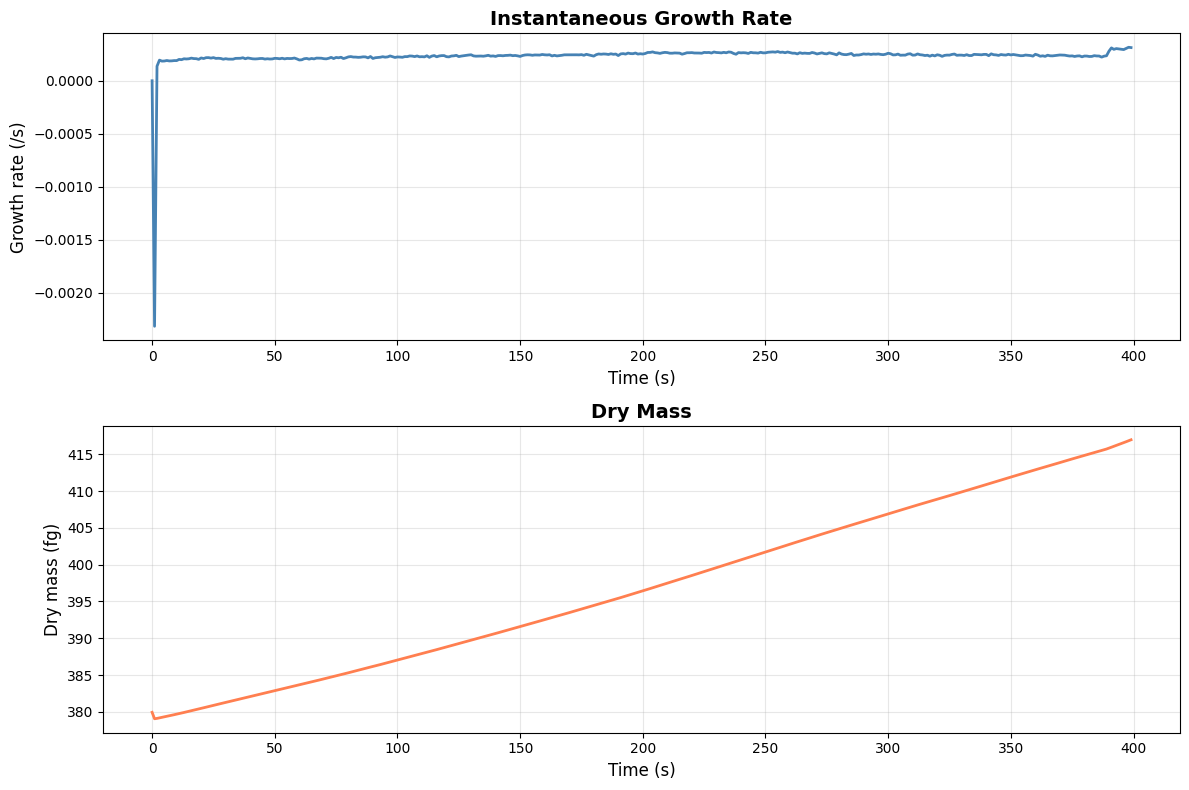

Simulation duration: 400 seconds
Growth rate: mean=0.000232 /s, std=0.000130 /s
Dry mass: mean=396.99 fg, std=11.18 fg


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Extract growth rate and dry mass
growth_rate = df_history['listeners__mass__instantaneous_growth_rate'].values
dry_mass = df_history['listeners__mass__dry_mass'].values

# Time in seconds (1 sec per timestep)
time_sec = np.arange(len(growth_rate))

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Growth rate
ax1.plot(time_sec, growth_rate, linewidth=2, color='steelblue')
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Growth rate (/s)', fontsize=12)
ax1.set_title('Instantaneous Growth Rate', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Dry mass
ax2.plot(time_sec, dry_mass, linewidth=2, color='coral')
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Dry mass (fg)', fontsize=12)
ax2.set_title('Dry Mass', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print(f"Simulation duration: {len(time_sec)} seconds")
print(f"Growth rate: mean={np.mean(growth_rate):.6f} /s, std={np.std(growth_rate):.6f} /s")
print(f"Dry mass: mean={np.mean(dry_mass):.2f} fg, std={np.std(dry_mass):.2f} fg")

=== Variant Metadata ===
condition: {'0': 'baseline', '1': {'condition': 'with_aa'}, '2': {'condition': 'acetate'}, '3': {'condition': 'succinate'}, '4': {'condition': 'no_oxygen'}}

Found 7 parquet files: ['1200.pq', '1600.pq', '2000.pq', '2400.pq', '2529.pq', '400.pq', '800.pq']

Total timesteps: 2529
Time range: 0.0 to 2528.0 seconds


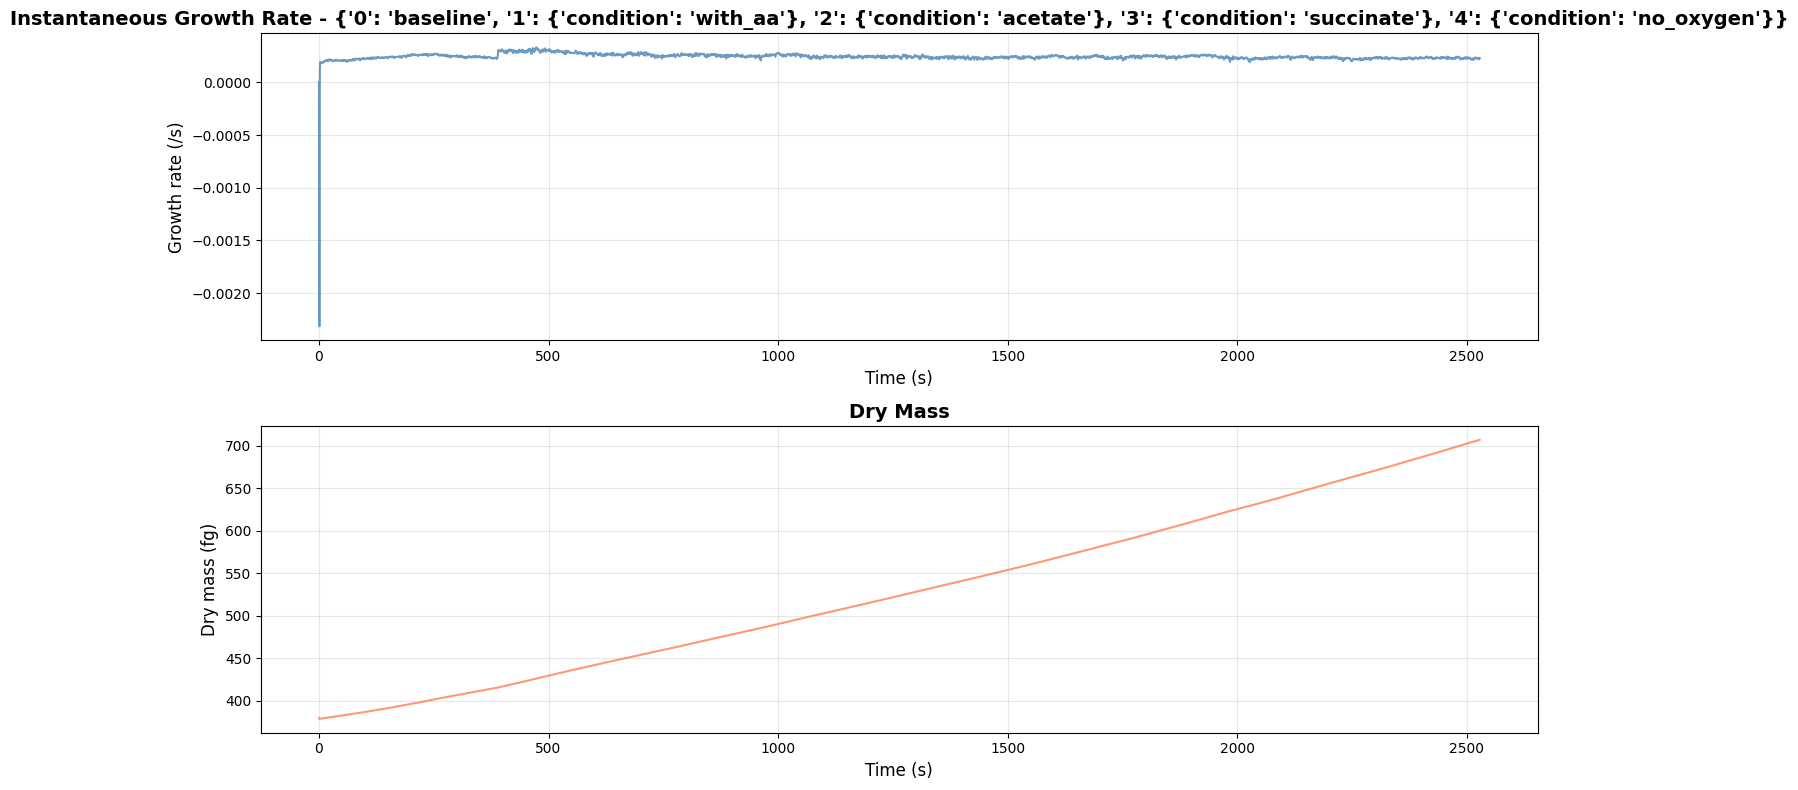


=== Statistics ===
Simulation duration: 2528.0 seconds (42.1 min)
Growth rate: mean=0.000246 /s, std=0.000055 /s
Dry mass: initial=379.95 fg, final=707.24 fg
Dry mass fold change: 1.86x


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

# Read variant metadata
metadata_path = "/user/home/il22158/work/vEcoli/out/all_media_conditions1/variant_sim_data/metadata.json"
with open(metadata_path, 'r') as f:
    variant_metadata = json.load(f)

print("=== Variant Metadata ===")
for key, value in variant_metadata.items():
    print(f"{key}: {value}")

# Find all parquet files in history folder
history_folder = path0.replace('/configuration/', '/history/')
pq_files = sorted(glob.glob(f"{history_folder}/*.pq"))
print(f"\nFound {len(pq_files)} parquet files: {[f.split('/')[-1] for f in pq_files]}")

# Read all files and concatenate
all_data = []
for pq_file in pq_files:
    df_temp = pd.read_parquet(pq_file)
    all_data.append(df_temp)
    
df_all = pd.concat(all_data, ignore_index=True)

# Sort by time column to ensure proper sequence
df_all = df_all.sort_values('time').reset_index(drop=True)
print(f"\nTotal timesteps: {len(df_all)}")
print(f"Time range: {df_all['time'].min()} to {df_all['time'].max()} seconds")

# Extract growth rate and dry mass
growth_rate = df_all['listeners__mass__instantaneous_growth_rate'].values
dry_mass = df_all['listeners__mass__dry_mass'].values
time_sec = df_all['time'].values

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Growth rate
ax1.plot(time_sec, growth_rate, linewidth=1.5, color='steelblue', alpha=0.8)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Growth rate (/s)', fontsize=12)
ax1.set_title(f'Instantaneous Growth Rate - {variant_metadata.get("condition", "Unknown")}', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Dry mass
ax2.plot(time_sec, dry_mass, linewidth=1.5, color='coral', alpha=0.8)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Dry mass (fg)', fontsize=12)
ax2.set_title('Dry Mass', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print(f"\n=== Statistics ===")
print(f"Simulation duration: {time_sec[-1] - time_sec[0]} seconds ({(time_sec[-1] - time_sec[0])/60:.1f} min)")
print(f"Growth rate: mean={np.mean(growth_rate):.6f} /s, std={np.std(growth_rate):.6f} /s")
print(f"Dry mass: initial={dry_mass[0]:.2f} fg, final={dry_mass[-1]:.2f} fg")
print(f"Dry mass fold change: {dry_mass[-1]/dry_mass[0]:.2f}x")

Variant 0: variant_0 - 7 files
Variant 1: variant_1 - 6 files
Variant 2: variant_2 - 7 files
Variant 3: variant_3 - 7 files
Variant 4: variant_4 - 7 files


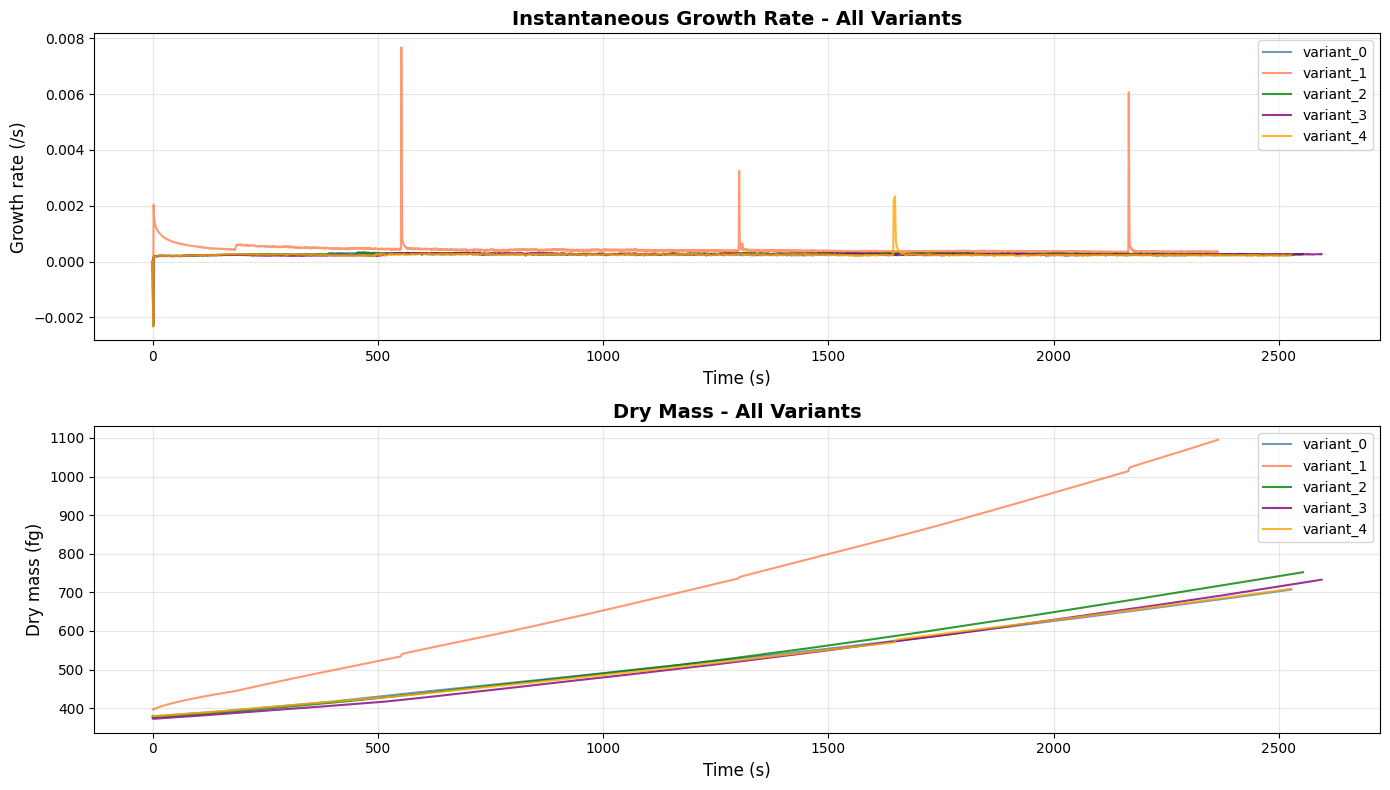


=== Statistics by Variant ===

variant_0:
  Duration: 2528 s (42.1 min)
  Growth rate: mean=0.000246 /s
  Dry mass: 380.0 → 707.2 fg (1.86x)

variant_1:
  Duration: 2365 s (39.4 min)
  Growth rate: mean=0.000429 /s
  Dry mass: 396.8 → 1095.1 fg (2.76x)

variant_2:
  Duration: 2554 s (42.6 min)
  Growth rate: mean=0.000270 /s
  Dry mass: 377.2 → 752.1 fg (1.99x)

variant_3:
  Duration: 2595 s (43.2 min)
  Growth rate: mean=0.000260 /s
  Dry mass: 373.3 → 732.7 fg (1.96x)

variant_4:
  Duration: 2527 s (42.1 min)
  Growth rate: mean=0.000247 /s
  Dry mass: 380.0 → 709.0 fg (1.87x)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

# Read all variants (0-4)
all_variants = {}
for variant_id in range(5):
    # Update path for each variant
    variant_path = path0.replace('/variant=0/', f'/variant={variant_id}/')
    
    # Read variant metadata
    metadata_path = f"/user/home/il22158/work/vEcoli/out/all_media_conditions1/variant_sim_data/{variant_id}.cPickle.json"
    try:
        with open(metadata_path, 'r') as f:
            variant_metadata = json.load(f)
    except:
        variant_metadata = {"condition": f"variant_{variant_id}"}
    
    # Find all parquet files in history folder
    history_folder = variant_path.replace('/configuration/', '/history/')
    pq_files = sorted(glob.glob(f"{history_folder}/*.pq"))
    
    if len(pq_files) == 0:
        print(f"No files found for variant {variant_id}")
        continue
    
    print(f"Variant {variant_id}: {variant_metadata.get('condition', 'Unknown')} - {len(pq_files)} files")
    
    # Read all files and concatenate
    all_data = []
    for pq_file in pq_files:
        df_temp = pd.read_parquet(pq_file)
        all_data.append(df_temp)
    
    df_variant = pd.concat(all_data, ignore_index=True)
    df_variant = df_variant.sort_values('time').reset_index(drop=True)
    
    all_variants[variant_id] = {
        'metadata': variant_metadata,
        'time': df_variant['time'].values,
        'growth_rate': df_variant['listeners__mass__instantaneous_growth_rate'].values,
        'dry_mass': df_variant['listeners__mass__dry_mass'].values
    }

# Plot all variants
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

colors = ['steelblue', 'coral', 'green', 'purple', 'orange']
for variant_id, data in all_variants.items():
    label = data['metadata'].get('condition', f'Variant {variant_id}')
    
    # Growth rate
    ax1.plot(data['time'], data['growth_rate'], 
             linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)
    
    # Dry mass
    ax2.plot(data['time'], data['dry_mass'], 
             linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)

# Format growth rate plot
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Growth rate (/s)', fontsize=12)
ax1.set_title('Instantaneous Growth Rate - All Variants', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)

# Format dry mass plot
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Dry mass (fg)', fontsize=12)
ax2.set_title('Dry Mass - All Variants', fontsize=14, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics for each variant
print("\n=== Statistics by Variant ===")
for variant_id, data in all_variants.items():
    condition = data['metadata'].get('condition', f'Variant {variant_id}')
    print(f"\n{condition}:")
    print(f"  Duration: {data['time'][-1] - data['time'][0]:.0f} s ({(data['time'][-1] - data['time'][0])/60:.1f} min)")
    print(f"  Growth rate: mean={np.mean(data['growth_rate']):.6f} /s")
    print(f"  Dry mass: {data['dry_mass'][0]:.1f} → {data['dry_mass'][-1]:.1f} fg ({data['dry_mass'][-1]/data['dry_mass'][0]:.2f}x)")

Variant 0: variant_0 - 7 files
Variant 1: variant_1 - 6 files
Variant 1: variant_1 - 6 files
Variant 2: variant_2 - 7 files
Variant 2: variant_2 - 7 files
Variant 3: variant_3 - 7 files
Variant 3: variant_3 - 7 files
Variant 4: variant_4 - 7 files
Variant 4: variant_4 - 7 files


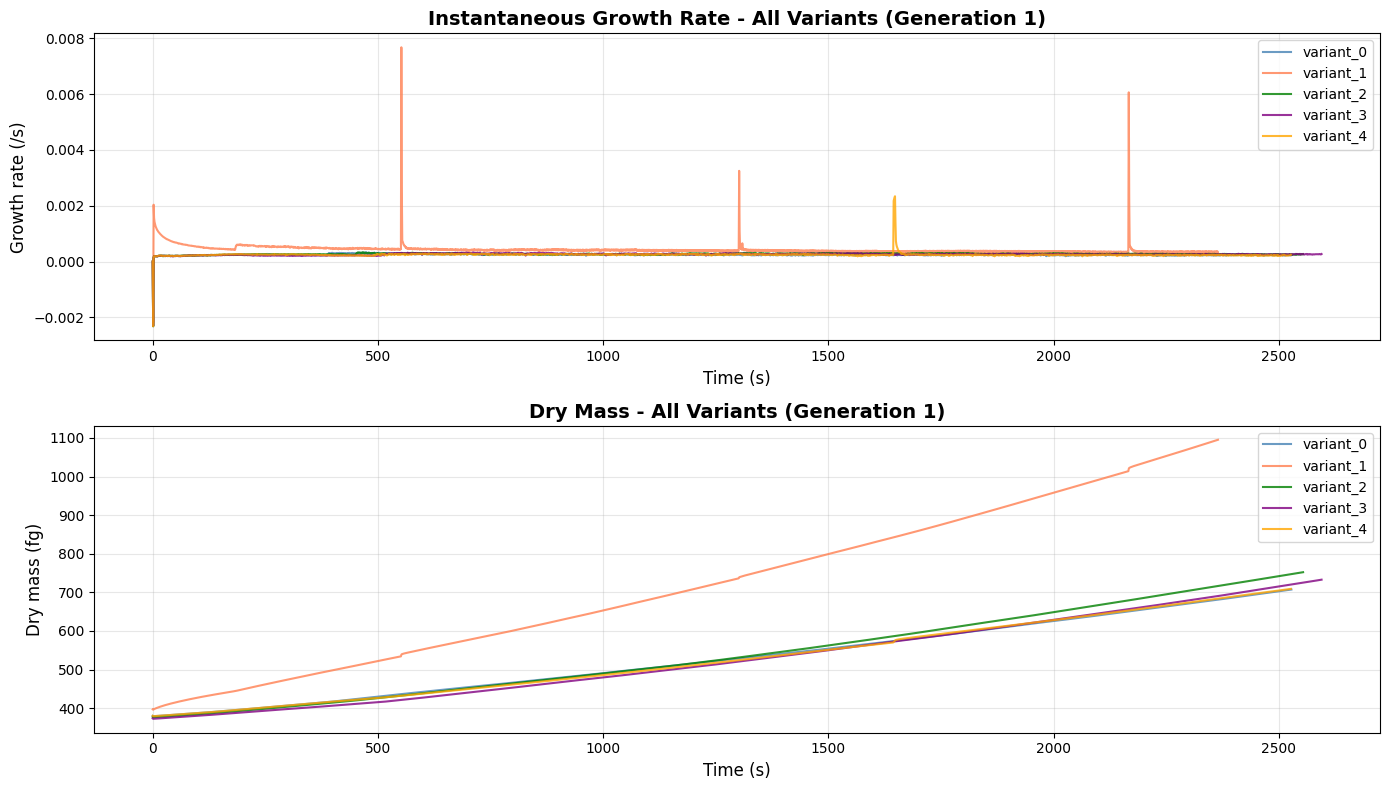


=== Statistics by Variant (Generation 1) ===

variant_0:
  Duration: 2528 s (42.1 min)
  Growth rate: mean=0.000246 /s
  Dry mass: 380.0 → 707.2 fg (1.86x)

variant_1:
  Duration: 2365 s (39.4 min)
  Growth rate: mean=0.000429 /s
  Dry mass: 396.8 → 1095.1 fg (2.76x)

variant_2:
  Duration: 2554 s (42.6 min)
  Growth rate: mean=0.000270 /s
  Dry mass: 377.2 → 752.1 fg (1.99x)

variant_3:
  Duration: 2595 s (43.2 min)
  Growth rate: mean=0.000260 /s
  Dry mass: 373.3 → 732.7 fg (1.96x)

variant_4:
  Duration: 2527 s (42.1 min)
  Growth rate: mean=0.000247 /s
  Dry mass: 380.0 → 709.0 fg (1.87x)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

# Set generation number here
GENERATION = 1

# Update path to use GENERATION variable
path0 = f"/user/home/il22158/work/vEcoli/out/all_media_conditions1/configuration/experiment_id=all_media_conditions1/variant=0/lineage_seed=0/generation={GENERATION}/agent_id=0"

# Read all variants (0-4)
all_variants = {}
for variant_id in range(5):
    # Update path for each variant
    variant_path = path0.replace('/variant=0/', f'/variant={variant_id}/')
    
    # Read variant metadata
    metadata_path = f"/user/home/il22158/work/vEcoli/out/all_media_conditions1/variant_sim_data/{variant_id}.cPickle.json"
    try:
        with open(metadata_path, 'r') as f:
            variant_metadata = json.load(f)
    except:
        variant_metadata = {"condition": f"variant_{variant_id}"}
    
    # Find all parquet files in history folder
    history_folder = variant_path.replace('/configuration/', '/history/')
    pq_files = sorted(glob.glob(f"{history_folder}/*.pq"))
    
    if len(pq_files) == 0:
        print(f"No files found for variant {variant_id}")
        continue
    
    print(f"Variant {variant_id}: {variant_metadata.get('condition', 'Unknown')} - {len(pq_files)} files")
    
    # Read all files and concatenate
    all_data = []
    for pq_file in pq_files:
        df_temp = pd.read_parquet(pq_file)
        all_data.append(df_temp)
    
    df_variant = pd.concat(all_data, ignore_index=True)
    df_variant = df_variant.sort_values('time').reset_index(drop=True)
    
    all_variants[variant_id] = {
        'metadata': variant_metadata,
        'time': df_variant['time'].values,
        'growth_rate': df_variant['listeners__mass__instantaneous_growth_rate'].values,
        'dry_mass': df_variant['listeners__mass__dry_mass'].values
    }

# Plot all variants
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

colors = ['steelblue', 'coral', 'green', 'purple', 'orange']
for variant_id, data in all_variants.items():
    label = data['metadata'].get('condition', f'Variant {variant_id}')
    
    # Growth rate
    ax1.plot(data['time'], data['growth_rate'], 
             linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)
    
    # Dry mass
    ax2.plot(data['time'], data['dry_mass'], 
             linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)

# Format growth rate plot
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Growth rate (/s)', fontsize=12)
ax1.set_title(f'Instantaneous Growth Rate - All Variants (Generation {GENERATION})', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)

# Format dry mass plot
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Dry mass (fg)', fontsize=12)
ax2.set_title(f'Dry Mass - All Variants (Generation {GENERATION})', fontsize=14, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics for each variant
print(f"\n=== Statistics by Variant (Generation {GENERATION}) ===")
for variant_id, data in all_variants.items():
    condition = data['metadata'].get('condition', f'Variant {variant_id}')
    print(f"\n{condition}:")
    print(f"  Duration: {data['time'][-1] - data['time'][0]:.0f} s ({(data['time'][-1] - data['time'][0])/60:.1f} min)")
    print(f"  Growth rate: mean={np.mean(data['growth_rate']):.6f} /s")
    print(f"  Dry mass: {data['dry_mass'][0]:.1f} → {data['dry_mass'][-1]:.1f} fg ({data['dry_mass'][-1]/data['dry_mass'][0]:.2f}x)")

Variant 0: variant_0 - 8 files
Variant 1: variant_1 - 5 files
Variant 1: variant_1 - 5 files
Variant 2: variant_2 - 15 files
Variant 2: variant_2 - 15 files
Variant 3: variant_3 - 8 files
Variant 3: variant_3 - 8 files
Variant 4: variant_4 - 14 files
Variant 4: variant_4 - 14 files


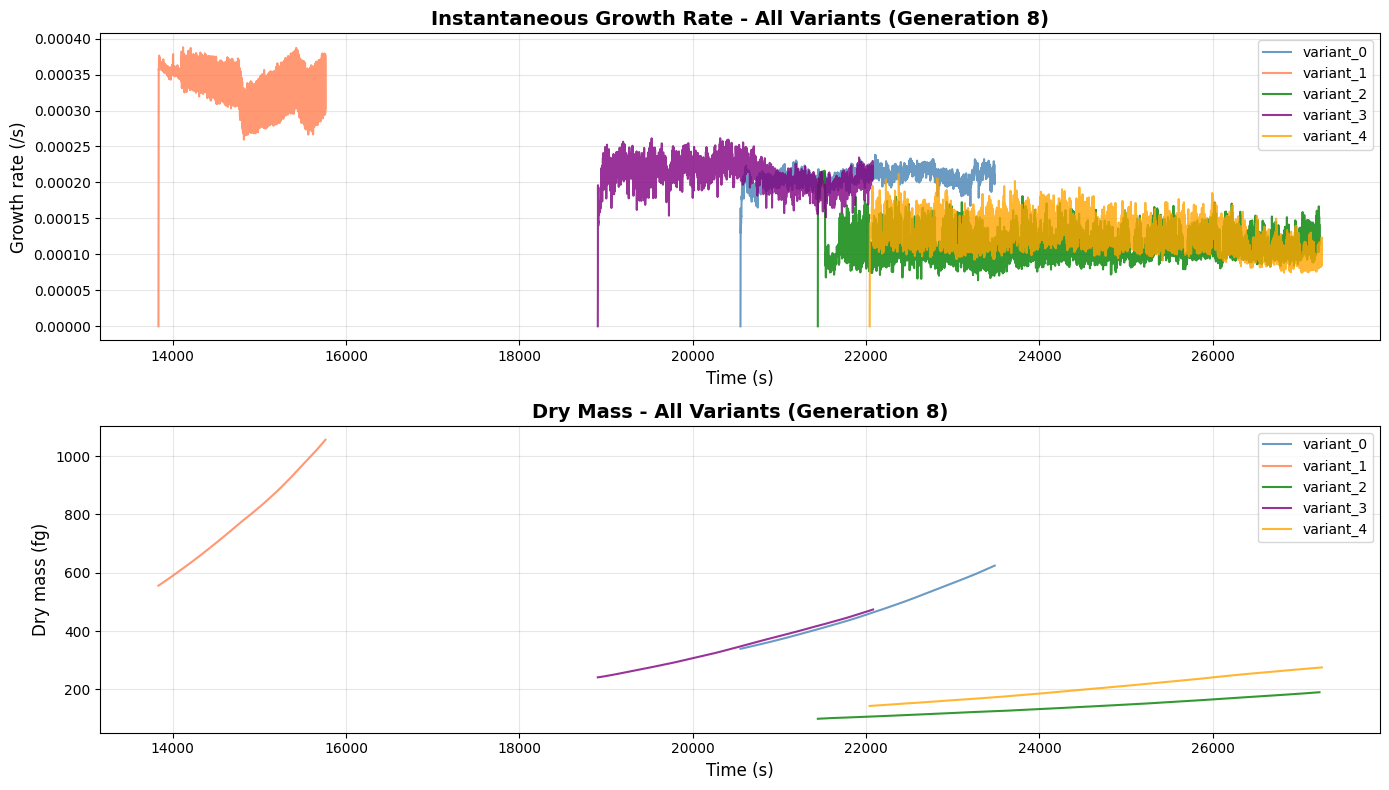


=== Statistics by Variant (Generation 8) ===

variant_0:
  Duration: 2933 s (48.9 min)
  Growth rate: mean=0.000208 /s
  Dry mass: 339.3 → 624.5 fg (1.84x)

variant_1:
  Duration: 1926 s (32.1 min)
  Growth rate: mean=0.000333 /s
  Dry mass: 555.8 → 1056.0 fg (1.90x)

variant_2:
  Duration: 5787 s (96.5 min)
  Growth rate: mean=0.000112 /s
  Dry mass: 99.3 → 190.2 fg (1.92x)

variant_3:
  Duration: 3175 s (52.9 min)
  Growth rate: mean=0.000212 /s
  Dry mass: 241.4 → 474.0 fg (1.96x)

variant_4:
  Duration: 5216 s (86.9 min)
  Growth rate: mean=0.000125 /s
  Dry mass: 143.3 → 275.3 fg (1.92x)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

# Set generation number here
GENERATION = 8

# Base path template (note: using agent_id=00000000 based on directory structure)
path0 = f"/user/home/il22158/work/vEcoli/out/all_media_conditions1/history/experiment_id=all_media_conditions1/variant=0/lineage_seed=0/generation={GENERATION}/agent_id=00000000"

# Read all variants (0-4)
all_variants = {}
for variant_id in range(5):
    # Update path for each variant
    history_folder = path0.replace('/variant=0/', f'/variant={variant_id}/')
    
    # Read variant metadata
    metadata_path = f"/user/home/il22158/work/vEcoli/out/all_media_conditions1/variant_sim_data/{variant_id}.cPickle.json"
    try:
        with open(metadata_path, 'r') as f:
            variant_metadata = json.load(f)
    except:
        variant_metadata = {"condition": f"variant_{variant_id}"}
    
    # Find all parquet files
    pq_files = sorted(glob.glob(f"{history_folder}/*.pq"))
    
    if len(pq_files) == 0:
        print(f"No files found for variant {variant_id} in: {history_folder}")
        continue
    
    print(f"Variant {variant_id}: {variant_metadata.get('condition', 'Unknown')} - {len(pq_files)} files")
    
    # Read all files and concatenate
    all_data = []
    for pq_file in pq_files:
        df_temp = pd.read_parquet(pq_file)
        all_data.append(df_temp)
    
    df_variant = pd.concat(all_data, ignore_index=True)
    df_variant = df_variant.sort_values('time').reset_index(drop=True)
    
    all_variants[variant_id] = {
        'metadata': variant_metadata,
        'time': df_variant['time'].values,
        'growth_rate': df_variant['listeners__mass__instantaneous_growth_rate'].values,
        'dry_mass': df_variant['listeners__mass__dry_mass'].values
    }

# Plot all variants
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

colors = ['steelblue', 'coral', 'green', 'purple', 'orange']
for variant_id, data in all_variants.items():
    label = data['metadata'].get('condition', f'Variant {variant_id}')
    
    # Growth rate
    ax1.plot(data['time'], data['growth_rate'], 
             linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)
    
    # Dry mass
    ax2.plot(data['time'], data['dry_mass'], 
             linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)

# Format growth rate plot
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Growth rate (/s)', fontsize=12)
ax1.set_title(f'Instantaneous Growth Rate - All Variants (Generation {GENERATION})', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)

# Format dry mass plot
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Dry mass (fg)', fontsize=12)
ax2.set_title(f'Dry Mass - All Variants (Generation {GENERATION})', fontsize=14, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics for each variant
print(f"\n=== Statistics by Variant (Generation {GENERATION}) ===")
for variant_id, data in all_variants.items():
    condition = data['metadata'].get('condition', f'Variant {variant_id}')
    print(f"\n{condition}:")
    print(f"  Duration: {data['time'][-1] - data['time'][0]:.0f} s ({(data['time'][-1] - data['time'][0])/60:.1f} min)")
    print(f"  Growth rate: mean={np.mean(data['growth_rate']):.6f} /s")
    print(f"  Dry mass: {data['dry_mass'][0]:.1f} → {data['dry_mass'][-1]:.1f} fg ({data['dry_mass'][-1]/data['dry_mass'][0]:.2f}x)")

Variant 0: variant_0 - 8 files
Variant 1: variant_1 - 5 files
Variant 1: variant_1 - 5 files
Variant 2: variant_2 - 15 files
Variant 2: variant_2 - 15 files
Variant 3: variant_3 - 8 files
Variant 3: variant_3 - 8 files
Variant 4: variant_4 - 14 files
Variant 4: variant_4 - 14 files


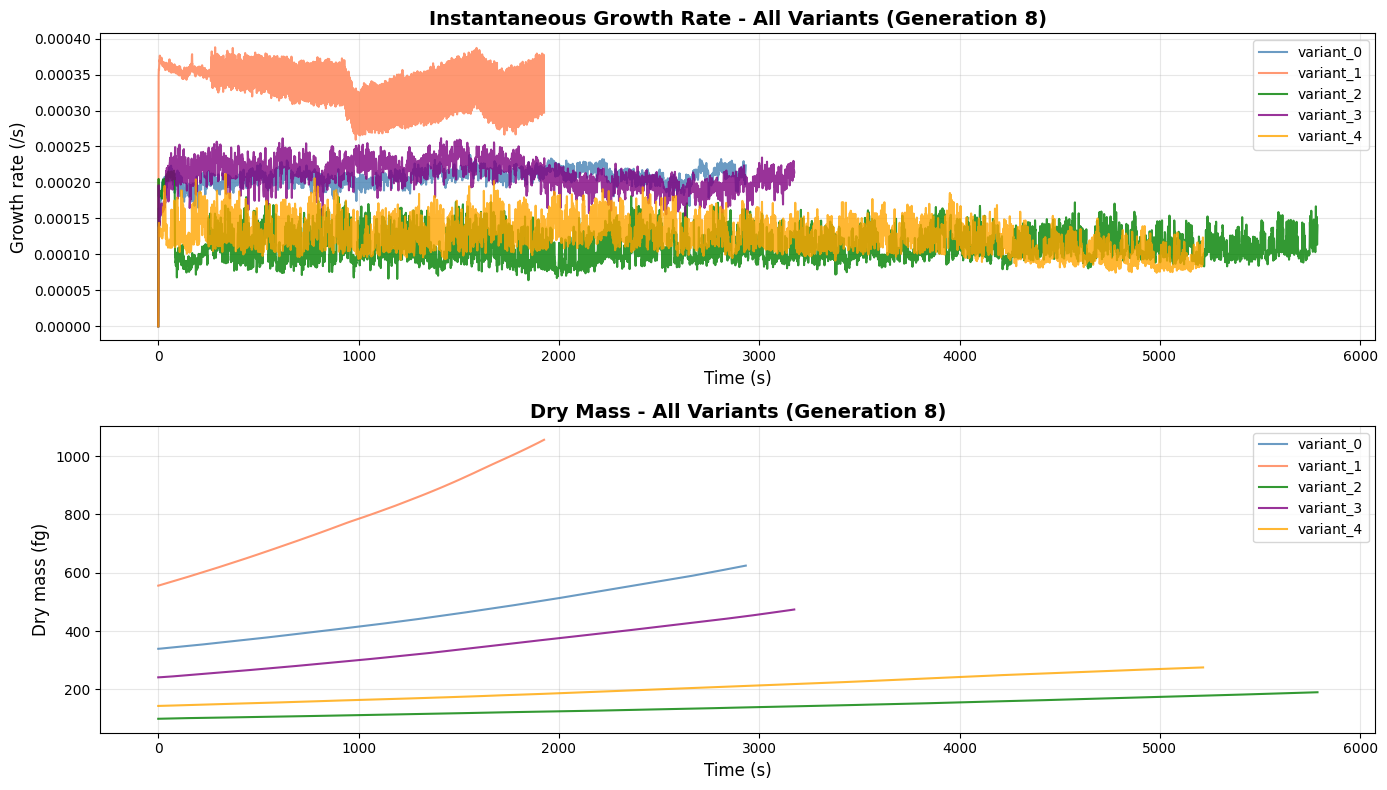


=== Statistics by Variant (Generation 8) ===

variant_0:
  Duration: 2933 s (48.9 min)
  Growth rate: mean=0.000208 /s
  Dry mass: 339.3 → 624.5 fg (1.84x)

variant_1:
  Duration: 1926 s (32.1 min)
  Growth rate: mean=0.000333 /s
  Dry mass: 555.8 → 1056.0 fg (1.90x)

variant_2:
  Duration: 5787 s (96.5 min)
  Growth rate: mean=0.000112 /s
  Dry mass: 99.3 → 190.2 fg (1.92x)

variant_3:
  Duration: 3175 s (52.9 min)
  Growth rate: mean=0.000212 /s
  Dry mass: 241.4 → 474.0 fg (1.96x)

variant_4:
  Duration: 5216 s (86.9 min)
  Growth rate: mean=0.000125 /s
  Dry mass: 143.3 → 275.3 fg (1.92x)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

# Set generation number here
GENERATION = 8

# Base path template (note: using agent_id=00000000 based on directory structure)
path0 = f"/user/home/il22158/work/vEcoli/out/all_media_conditions1/history/experiment_id=all_media_conditions1/variant=0/lineage_seed=0/generation={GENERATION}/agent_id=00000000"

# Read all variants (0-4)
all_variants = {}
for variant_id in range(5):
    # Update path for each variant
    history_folder = path0.replace('/variant=0/', f'/variant={variant_id}/')
    
    # Read variant metadata
    metadata_path = f"/user/home/il22158/work/vEcoli/out/all_media_conditions1/variant_sim_data/{variant_id}.cPickle.json"
    try:
        with open(metadata_path, 'r') as f:
            variant_metadata = json.load(f)
    except:
        variant_metadata = {"condition": f"variant_{variant_id}"}
    
    # Find all parquet files
    pq_files = sorted(glob.glob(f"{history_folder}/*.pq"))
    
    if len(pq_files) == 0:
        print(f"No files found for variant {variant_id} in: {history_folder}")
        continue
    
    print(f"Variant {variant_id}: {variant_metadata.get('condition', 'Unknown')} - {len(pq_files)} files")
    
    # Read all files and concatenate
    all_data = []
    for pq_file in pq_files:
        df_temp = pd.read_parquet(pq_file)
        all_data.append(df_temp)
    
    df_variant = pd.concat(all_data, ignore_index=True)
    df_variant = df_variant.sort_values('time').reset_index(drop=True)
    
    # Normalize time to start at 0 for this generation
    time_normalized = df_variant['time'].values - df_variant['time'].values[0]
    
    all_variants[variant_id] = {
        'metadata': variant_metadata,
        'time': time_normalized,  # Use normalized time
        'growth_rate': df_variant['listeners__mass__instantaneous_growth_rate'].values,
        'dry_mass': df_variant['listeners__mass__dry_mass'].values
    }

# Plot all variants
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

colors = ['steelblue', 'coral', 'green', 'purple', 'orange']
for variant_id, data in all_variants.items():
    label = data['metadata'].get('condition', f'Variant {variant_id}')
    
    # Growth rate
    ax1.plot(data['time'], data['growth_rate'], 
             linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)
    
    # Dry mass
    ax2.plot(data['time'], data['dry_mass'], 
             linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)

# Format growth rate plot
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Growth rate (/s)', fontsize=12)
ax1.set_title(f'Instantaneous Growth Rate - All Variants (Generation {GENERATION})', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)

# Format dry mass plot
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Dry mass (fg)', fontsize=12)
ax2.set_title(f'Dry Mass - All Variants (Generation {GENERATION})', fontsize=14, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics for each variant
print(f"\n=== Statistics by Variant (Generation {GENERATION}) ===")
for variant_id, data in all_variants.items():
    condition = data['metadata'].get('condition', f'Variant {variant_id}')
    print(f"\n{condition}:")
    print(f"  Duration: {data['time'][-1] - data['time'][0]:.0f} s ({(data['time'][-1] - data['time'][0])/60:.1f} min)")
    print(f"  Growth rate: mean={np.mean(data['growth_rate']):.6f} /s")
    print(f"  Dry mass: {data['dry_mass'][0]:.1f} → {data['dry_mass'][-1]:.1f} fg ({data['dry_mass'][-1]/data['dry_mass'][0]:.2f}x)")

✓ Variant 0 (baseline): 8 files
✓ Variant 1 (with_aa): 5 files
✓ Variant 1 (with_aa): 5 files
✓ Variant 2 (acetate): 15 files
✓ Variant 2 (acetate): 15 files
✓ Variant 3 (succinate): 8 files
✓ Variant 3 (succinate): 8 files
✓ Variant 4 (no_oxygen): 14 files
✓ Variant 4 (no_oxygen): 14 files


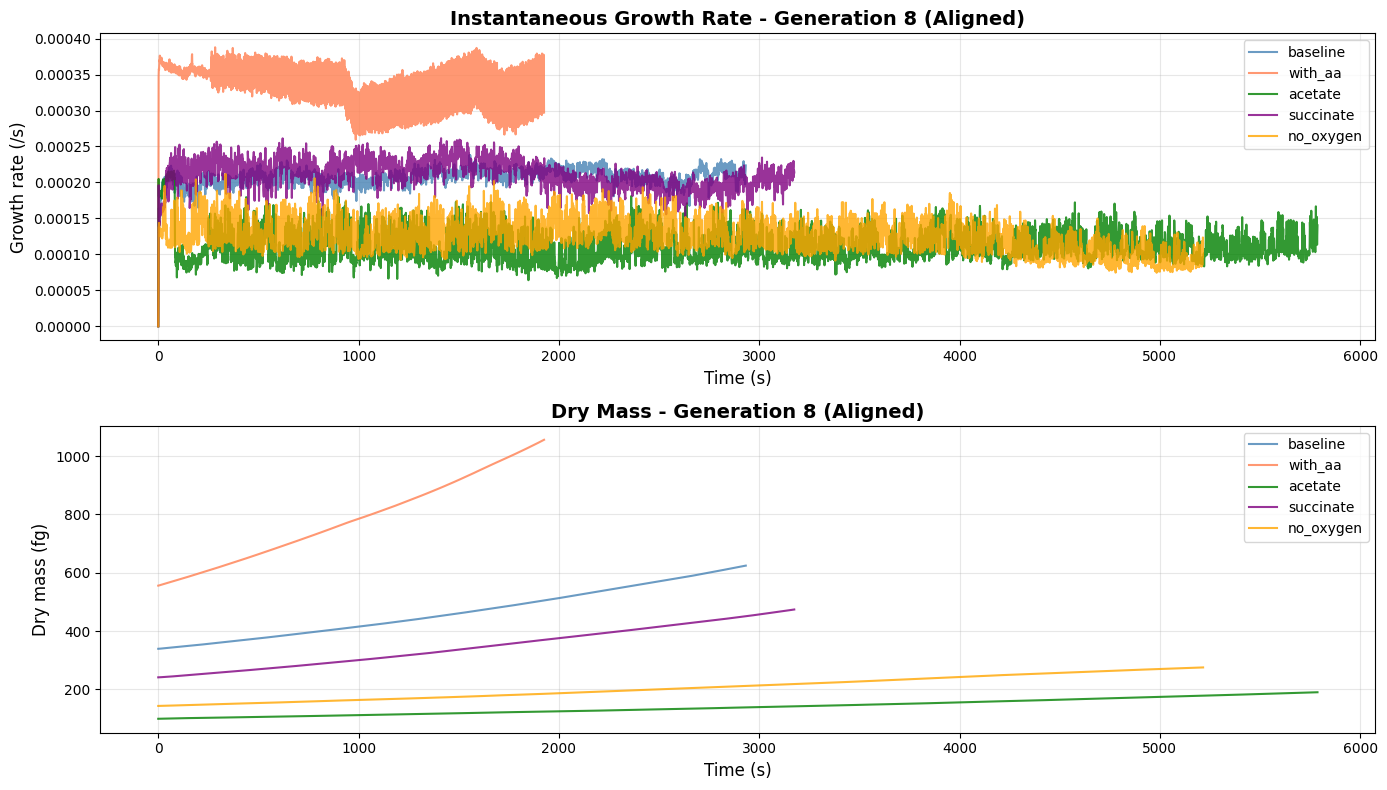


Statistics - Generation 8 (Aligned)

baseline:
  Duration: 2933 s (48.9 min)
  Growth rate: mean=0.000208 /s, std=0.000012 /s
  Dry mass: 339.3 → 624.5 fg (1.84x)

with_aa:
  Duration: 1926 s (32.1 min)
  Growth rate: mean=0.000333 /s, std=0.000031 /s
  Dry mass: 555.8 → 1056.0 fg (1.90x)

acetate:
  Duration: 5787 s (96.5 min)
  Growth rate: mean=0.000112 /s, std=0.000023 /s
  Dry mass: 99.3 → 190.2 fg (1.92x)

succinate:
  Duration: 3175 s (52.9 min)
  Growth rate: mean=0.000212 /s, std=0.000020 /s
  Dry mass: 241.4 → 474.0 fg (1.96x)

no_oxygen:
  Duration: 5216 s (86.9 min)
  Growth rate: mean=0.000125 /s, std=0.000023 /s
  Dry mass: 143.3 → 275.3 fg (1.92x)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

def plot_growth_data(generation=1, align_time=True, show_legend=True, figsize=(14, 8)):
    """
    Plot growth rate and dry mass for all variants in a specific generation.
    
    Parameters:
    -----------
    generation : int
        Generation number to analyze (1-8)
    align_time : bool
        If True, align all variants to start at time=0
        If False, use absolute timestamps from experiment start
    show_legend : bool
        Whether to show legend on plots
    figsize : tuple
        Figure size (width, height)
    
    Returns:
    --------
    all_variants : dict
        Dictionary containing data for all variants
    """
    
    # Load condition metadata
    metadata_file = "/user/home/il22158/work/vEcoli/out/all_media_conditions1/variant_sim_data/metadata.json"
    with open(metadata_file, 'r') as f:
        condition_metadata = json.load(f)
    
    # Determine agent_id format based on generation
    agent_id = "00000000" if generation >= 2 else "0"
    
    # Base path template
    base_path = f"/user/home/il22158/work/vEcoli/out/all_media_conditions1/history/experiment_id=all_media_conditions1/variant=0/lineage_seed=0/generation={generation}/agent_id={agent_id}"
    
    # Read all variants (0-4)
    all_variants = {}
    for variant_id in range(5):
        # Update path for each variant
        history_folder = base_path.replace('/variant=0/', f'/variant={variant_id}/')
        
        # Get condition name from metadata
        variant_str = str(variant_id)
        if variant_str in condition_metadata['condition']:
            condition_info = condition_metadata['condition'][variant_str]
            if isinstance(condition_info, dict) and 'condition' in condition_info:
                condition_name = condition_info['condition']
            elif isinstance(condition_info, str):
                condition_name = condition_info
            else:
                condition_name = f"variant_{variant_id}"
        else:
            condition_name = f"variant_{variant_id}"
        
        # Find all parquet files
        pq_files = sorted(glob.glob(f"{history_folder}/*.pq"))
        
        if len(pq_files) == 0:
            print(f"⚠ No files found for variant {variant_id} ({condition_name})")
            continue
        
        print(f"✓ Variant {variant_id} ({condition_name}): {len(pq_files)} files")
        
        # Read all files and concatenate
        all_data = []
        for pq_file in pq_files:
            df_temp = pd.read_parquet(pq_file)
            all_data.append(df_temp)
        
        df_variant = pd.concat(all_data, ignore_index=True)
        df_variant = df_variant.sort_values('time').reset_index(drop=True)
        
        # Get time array (aligned or absolute)
        if align_time:
            time_array = df_variant['time'].values - df_variant['time'].values[0]
            time_label = 'Time (s) - Aligned'
        else:
            time_array = df_variant['time'].values
            time_label = 'Time (s) - Absolute'
        
        all_variants[variant_id] = {
            'condition': condition_name,
            'time': time_array,
            'growth_rate': df_variant['listeners__mass__instantaneous_growth_rate'].values,
            'dry_mass': df_variant['listeners__mass__dry_mass'].values
        }
    
    # Plot all variants
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    
    colors = ['steelblue', 'coral', 'green', 'purple', 'orange']
    for variant_id, data in all_variants.items():
        label = data['condition']
        
        # Growth rate
        ax1.plot(data['time'], data['growth_rate'], 
                 linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)
        
        # Dry mass
        ax2.plot(data['time'], data['dry_mass'], 
                 linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)
    
    # Format growth rate plot
    ax1.set_xlabel(time_label if not align_time else 'Time (s)', fontsize=12)
    ax1.set_ylabel('Growth rate (/s)', fontsize=12)
    
    time_mode = "Aligned" if align_time else "Absolute Time"
    ax1.set_title(f'Instantaneous Growth Rate - Generation {generation} ({time_mode})', 
                  fontsize=14, fontweight='bold')
    if show_legend:
        ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Format dry mass plot
    ax2.set_xlabel(time_label if not align_time else 'Time (s)', fontsize=12)
    ax2.set_ylabel('Dry mass (fg)', fontsize=12)
    ax2.set_title(f'Dry Mass - Generation {generation} ({time_mode})', 
                  fontsize=14, fontweight='bold')
    if show_legend:
        ax2.legend(loc='best', fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics for each variant
    print(f"\n{'='*60}")
    print(f"Statistics - Generation {generation} ({'Aligned' if align_time else 'Absolute'})")
    print(f"{'='*60}")
    
    for variant_id, data in all_variants.items():
        condition = data['condition']
        print(f"\n{condition}:")
        print(f"  Duration: {data['time'][-1] - data['time'][0]:.0f} s ({(data['time'][-1] - data['time'][0])/60:.1f} min)")
        print(f"  Growth rate: mean={np.mean(data['growth_rate']):.6f} /s, std={np.std(data['growth_rate']):.6f} /s")
        print(f"  Dry mass: {data['dry_mass'][0]:.1f} → {data['dry_mass'][-1]:.1f} fg ({data['dry_mass'][-1]/data['dry_mass'][0]:.2f}x)")
    
    return all_variants


# Example usage:
# Generation 8 with aligned time (default)
data_gen8_aligned = plot_growth_data(generation=8, align_time=True)

# Generation 8 with absolute time
# data_gen8_absolute = plot_growth_data(generation=8, align_time=False)

# Generation 1 with aligned time
# data_gen1 = plot_growth_data(generation=1, align_time=True)

### Plot function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

def plot_growth_data(generation=1, align_time=True, show_legend=True, figsize=(14, 8)):
    """
    Plot growth rate and dry mass for all variants in a specific generation.
    
    Parameters:
    -----------
    generation : int
        Generation number to analyze (1-8)
    align_time : bool
        If True, align all variants to start at time=0
        If False, use absolute timestamps from experiment start
    show_legend : bool
        Whether to show legend on plots
    figsize : tuple
        Figure size (width, height)
    
    Returns:
    --------
    all_variants : dict
        Dictionary containing data for all variants
    """
    
    # Load condition metadata
    metadata_file = "/user/home/il22158/work/vEcoli/out/all_media_conditions1/variant_sim_data/metadata.json"
    with open(metadata_file, 'r') as f:
        condition_metadata = json.load(f)
    
    # Agent ID has number of zeros equal to generation number
    agent_id = "0" * generation
    
    # Base path template
    base_path = f"/user/home/il22158/work/vEcoli/out/all_media_conditions1/history/experiment_id=all_media_conditions1/variant=0/lineage_seed=0/generation={generation}/agent_id={agent_id}"
    
    # Read all variants (0-4)
    all_variants = {}
    for variant_id in range(5):
        # Update path for each variant
        history_folder = base_path.replace('/variant=0/', f'/variant={variant_id}/')
        
        # Get condition name from metadata
        variant_str = str(variant_id)
        if variant_str in condition_metadata['condition']:
            condition_info = condition_metadata['condition'][variant_str]
            if isinstance(condition_info, dict) and 'condition' in condition_info:
                condition_name = condition_info['condition']
            elif isinstance(condition_info, str):
                condition_name = condition_info
            else:
                condition_name = f"variant_{variant_id}"
        else:
            condition_name = f"variant_{variant_id}"
        
        # Find all parquet files
        pq_files = sorted(glob.glob(f"{history_folder}/*.pq"))
        
        if len(pq_files) == 0:
            print(f"⚠ No files found for variant {variant_id} ({condition_name})")
            continue
        
        print(f"✓ Variant {variant_id} ({condition_name}): {len(pq_files)} files")
        
        # Read all files and concatenate
        all_data = []
        for pq_file in pq_files:
            df_temp = pd.read_parquet(pq_file)
            all_data.append(df_temp)
        
        df_variant = pd.concat(all_data, ignore_index=True)
        df_variant = df_variant.sort_values('time').reset_index(drop=True)
        
        # Get time array (aligned or absolute)
        if align_time:
            time_array = df_variant['time'].values - df_variant['time'].values[0]
        else:
            time_array = df_variant['time'].values
        
        all_variants[variant_id] = {
            'condition': condition_name,
            'time': time_array,
            'growth_rate': df_variant['listeners__mass__instantaneous_growth_rate'].values,
            'dry_mass': df_variant['listeners__mass__dry_mass'].values
        }
    
    # Plot all variants
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    
    colors = ['steelblue', 'coral', 'green', 'purple', 'orange']
    for variant_id, data in all_variants.items():
        label = data['condition']
        
        # Growth rate
        ax1.plot(data['time'], data['growth_rate'], 
                 linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)
        
        # Dry mass
        ax2.plot(data['time'], data['dry_mass'], 
                 linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)
    
    # Format plots
    time_mode = "Aligned" if align_time else "Absolute Time"
    
    ax1.set_xlabel('Time (s)', fontsize=12)
    ax1.set_ylabel('Growth rate (/s)', fontsize=12)
    ax1.set_title(f'Instantaneous Growth Rate - Generation {generation} ({time_mode})', 
                  fontsize=14, fontweight='bold')
    if show_legend:
        ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    ax2.set_xlabel('Time (s)', fontsize=12)
    ax2.set_ylabel('Dry mass (fg)', fontsize=12)
    ax2.set_title(f'Dry Mass - Generation {generation} ({time_mode})', 
                  fontsize=14, fontweight='bold')
    if show_legend:
        ax2.legend(loc='best', fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{'='*60}")
    print(f"Statistics - Generation {generation} ({'Aligned' if align_time else 'Absolute'})")
    print(f"{'='*60}")
    
    for variant_id, data in all_variants.items():
        condition = data['condition']
        print(f"\n{condition}:")
        print(f"  Duration: {data['time'][-1] - data['time'][0]:.0f} s ({(data['time'][-1] - data['time'][0])/60:.1f} min)")
        print(f"  Growth rate: mean={np.mean(data['growth_rate']):.6f} /s, std={np.std(data['growth_rate']):.6f} /s")
        print(f"  Dry mass: {data['dry_mass'][0]:.1f} → {data['dry_mass'][-1]:.1f} fg ({data['dry_mass'][-1]/data['dry_mass'][0]:.2f}x)")
    
    return all_variants

✓ Variant 0 (baseline): 8 files
✓ Variant 1 (with_aa): 5 files
✓ Variant 1 (with_aa): 5 files
✓ Variant 2 (acetate): 12 files
✓ Variant 2 (acetate): 12 files
✓ Variant 3 (succinate): 9 files
✓ Variant 3 (succinate): 9 files
✓ Variant 4 (no_oxygen): 9 files
✓ Variant 4 (no_oxygen): 9 files


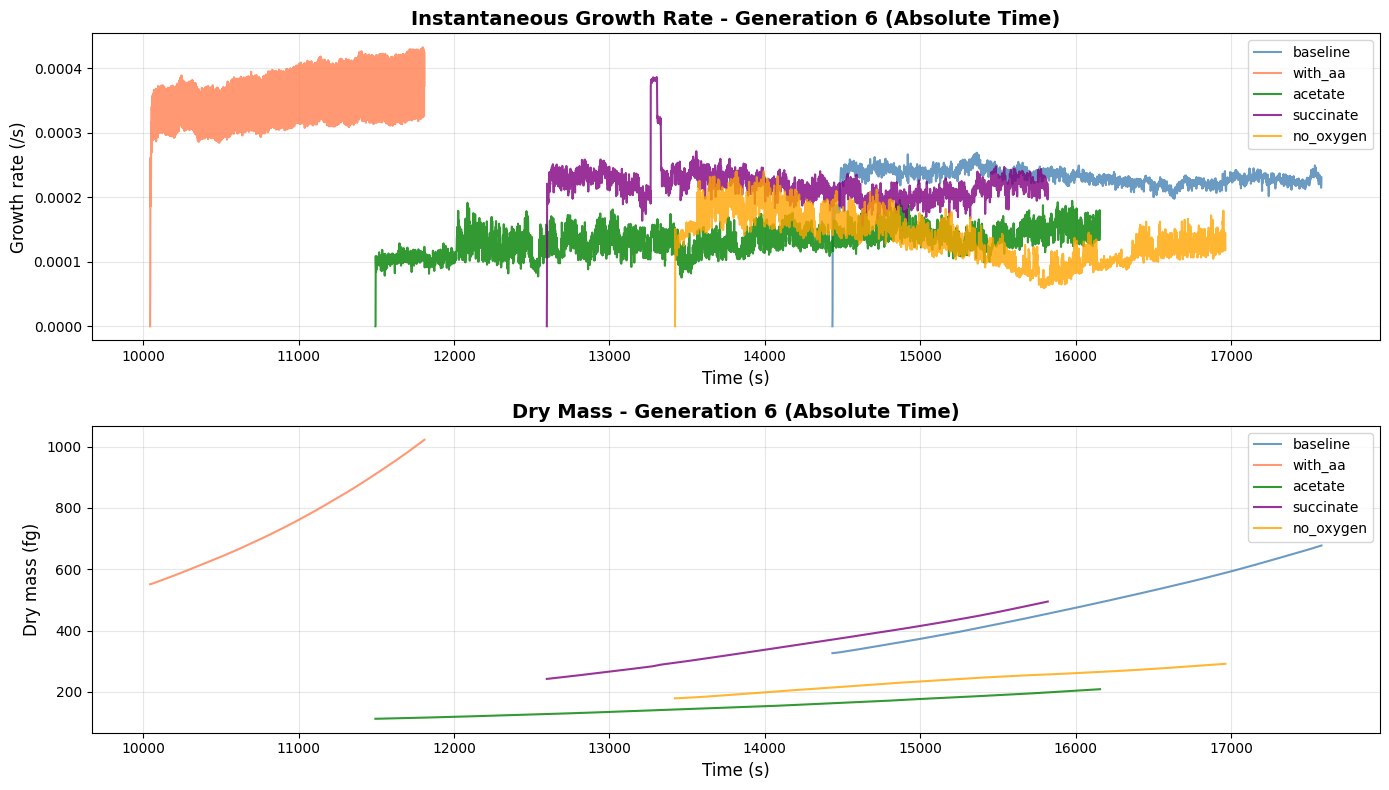


Statistics - Generation 6 (Absolute)

baseline:
  Duration: 3147 s (52.5 min)
  Growth rate: mean=0.000232 /s, std=0.000014 /s
  Dry mass: 326.4 → 677.3 fg (2.08x)

with_aa:
  Duration: 1765 s (29.4 min)
  Growth rate: mean=0.000350 /s, std=0.000039 /s
  Dry mass: 551.0 → 1022.2 fg (1.86x)

acetate:
  Duration: 4663 s (77.7 min)
  Growth rate: mean=0.000133 /s, std=0.000021 /s
  Dry mass: 112.3 → 208.8 fg (1.86x)

succinate:
  Duration: 3224 s (53.7 min)
  Growth rate: mean=0.000221 /s, std=0.000027 /s
  Dry mass: 242.4 → 494.7 fg (2.04x)

no_oxygen:
  Duration: 3542 s (59.0 min)
  Growth rate: mean=0.000138 /s, std=0.000038 /s
  Dry mass: 179.0 → 291.7 fg (1.63x)


In [2]:
# Generation 8 with absolute time
data_gen6_absolute = plot_growth_data(generation=6, align_time=False)

✓ Variant 0 (baseline): 8 files
✓ Variant 1 (with_aa): 5 files
✓ Variant 1 (with_aa): 5 files
✓ Variant 2 (acetate): 3 files
✓ Variant 2 (acetate): 3 files
✓ Variant 3 (succinate): 7 files
✓ Variant 3 (succinate): 7 files
✓ Variant 4 (no_oxygen): 7 files
✓ Variant 4 (no_oxygen): 7 files


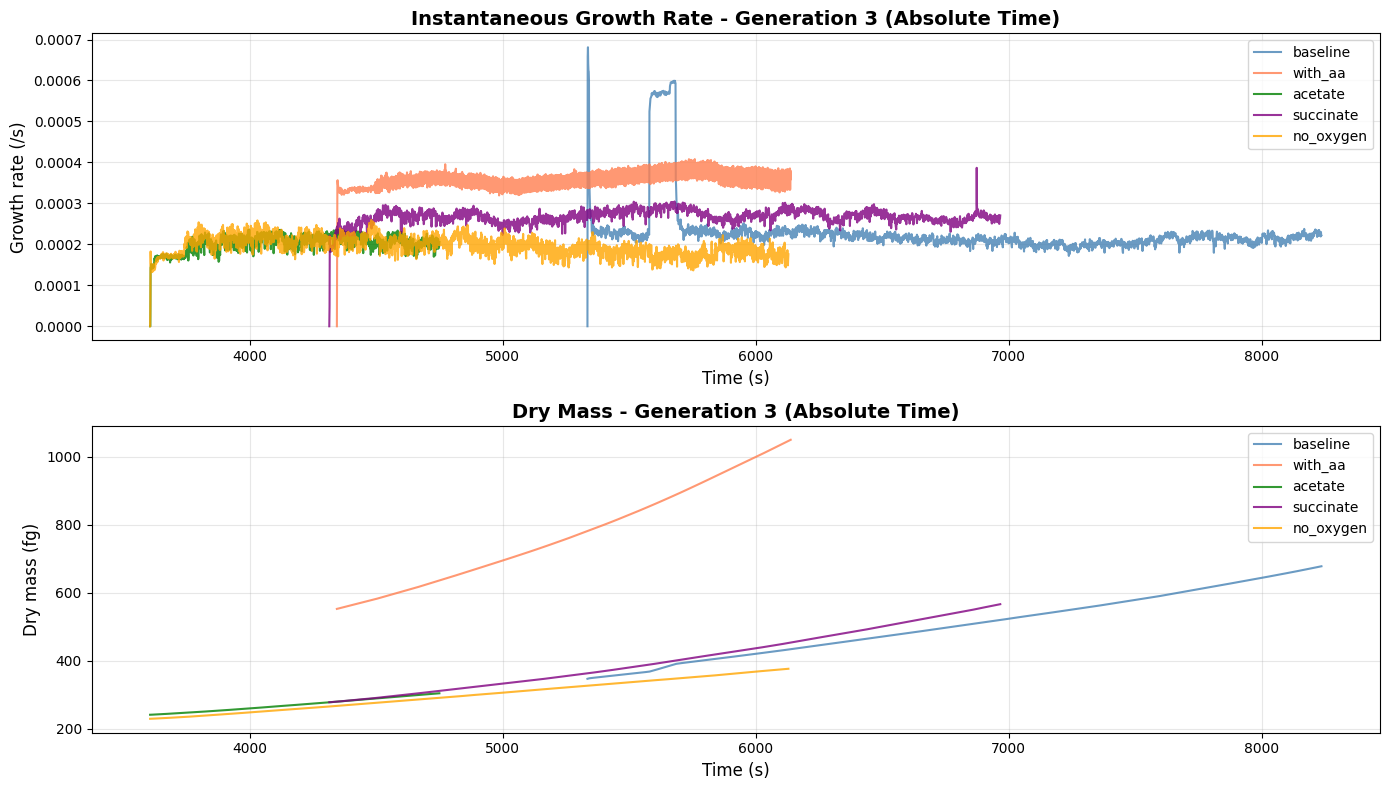


Statistics - Generation 3 (Absolute)

baseline:
  Duration: 2900 s (48.3 min)
  Growth rate: mean=0.000230 /s, std=0.000071 /s
  Dry mass: 347.4 → 678.0 fg (1.95x)

with_aa:
  Duration: 1793 s (29.9 min)
  Growth rate: mean=0.000357 /s, std=0.000022 /s
  Dry mass: 552.8 → 1049.6 fg (1.90x)

acetate:
  Duration: 1143 s (19.1 min)
  Growth rate: mean=0.000202 /s, std=0.000022 /s
  Dry mass: 241.8 → 304.9 fg (1.26x)

succinate:
  Duration: 2651 s (44.2 min)
  Growth rate: mean=0.000268 /s, std=0.000018 /s
  Dry mass: 278.6 → 566.6 fg (2.03x)

no_oxygen:
  Duration: 2522 s (42.0 min)
  Growth rate: mean=0.000196 /s, std=0.000024 /s
  Dry mass: 230.0 → 376.9 fg (1.64x)


In [3]:
# Generation 3 with absolute time
data_gen3_absolute = plot_growth_data(generation=3, align_time=False)

#### Read every X time step

✓ Variant 0 (baseline): 8 files
  Downsampled to 294 points (every 10s)
✓ Variant 1 (with_aa): 5 files
  Downsampled to 294 points (every 10s)
✓ Variant 1 (with_aa): 5 files
  Downsampled to 193 points (every 10s)
✓ Variant 2 (acetate): 15 files
  Downsampled to 193 points (every 10s)
✓ Variant 2 (acetate): 15 files
  Downsampled to 579 points (every 10s)
✓ Variant 3 (succinate): 8 files
  Downsampled to 579 points (every 10s)
✓ Variant 3 (succinate): 8 files
  Downsampled to 318 points (every 10s)
✓ Variant 4 (no_oxygen): 14 files
  Downsampled to 318 points (every 10s)
✓ Variant 4 (no_oxygen): 14 files
  Downsampled to 522 points (every 10s)
  Downsampled to 522 points (every 10s)


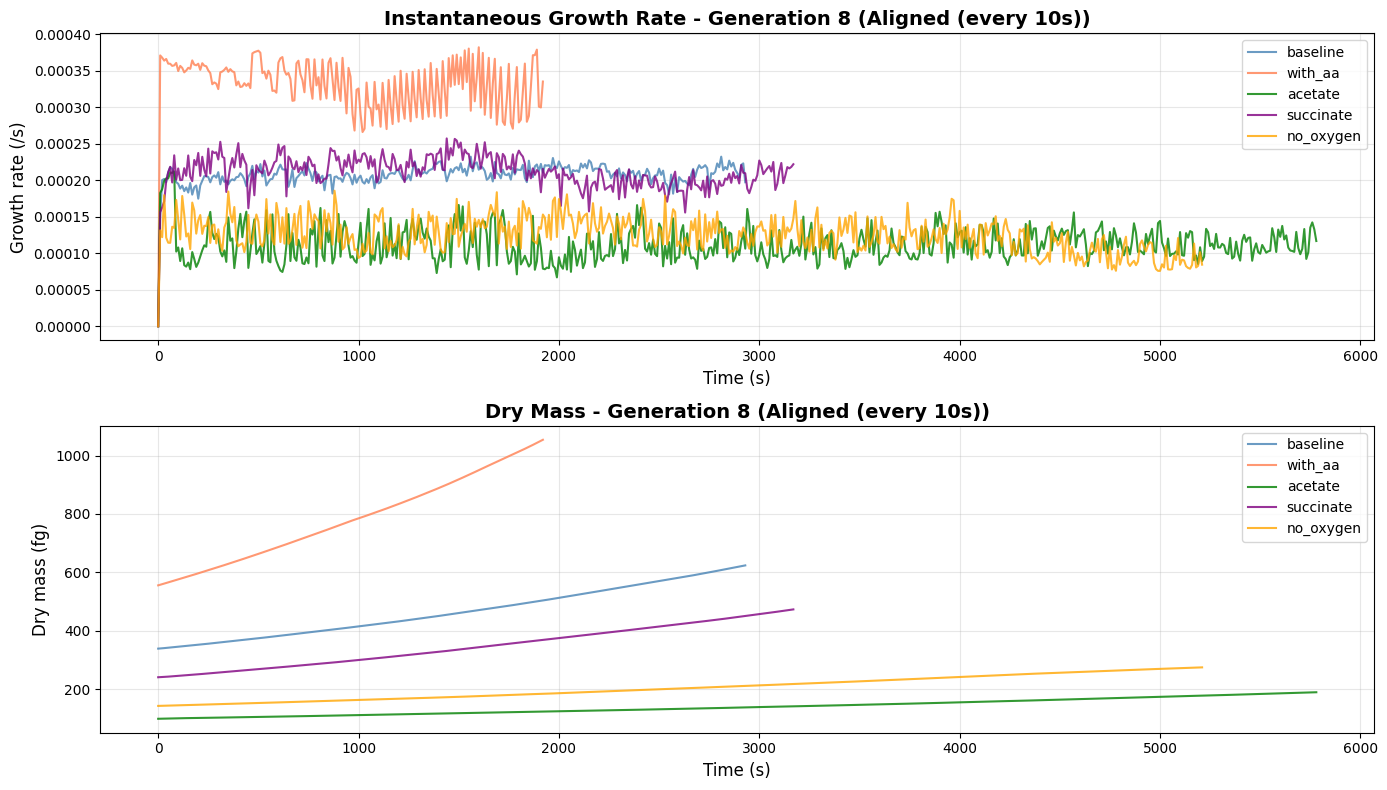


Statistics - Generation 8 (Aligned)

baseline:
  Duration: 2930 s (48.8 min)
  Growth rate: mean=0.000208 /s, std=0.000016 /s
  Dry mass: 339.3 → 624.1 fg (1.84x)

with_aa:
  Duration: 1920 s (32.0 min)
  Growth rate: mean=0.000331 /s, std=0.000039 /s
  Dry mass: 555.8 → 1053.9 fg (1.90x)

acetate:
  Duration: 5780 s (96.3 min)
  Growth rate: mean=0.000113 /s, std=0.000024 /s
  Dry mass: 99.3 → 190.0 fg (1.91x)

succinate:
  Duration: 3170 s (52.8 min)
  Growth rate: mean=0.000212 /s, std=0.000023 /s
  Dry mass: 241.4 → 473.5 fg (1.96x)

no_oxygen:
  Duration: 5210 s (86.8 min)
  Growth rate: mean=0.000125 /s, std=0.000024 /s
  Dry mass: 143.3 → 275.1 fg (1.92x)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

def plot_growth_data1(generation=1, align_time=True, downsample_sec=None, show_legend=True, figsize=(14, 8)):
    """
    Plot growth rate and dry mass for all variants in a specific generation.
    
    Parameters:
    -----------
    generation : int
        Generation number to analyze (1-8)
    align_time : bool
        If True, align all variants to start at time=0
        If False, use absolute timestamps from experiment start
    downsample_sec : int or None
        If specified, take only one data point every N seconds to reduce data density
        E.g., downsample_sec=10 means one point every 10 seconds
        If None, plot all data points
    show_legend : bool
        Whether to show legend on plots
    figsize : tuple
        Figure size (width, height)
    
    Returns:
    --------
    all_variants : dict
        Dictionary containing data for all variants
    """
    
    # Load condition metadata
    metadata_file = "/user/home/il22158/work/vEcoli/out/all_media_conditions1/variant_sim_data/metadata.json"
    with open(metadata_file, 'r') as f:
        condition_metadata = json.load(f)
    
    # Agent ID has number of zeros equal to generation number
    agent_id = "0" * generation
    
    # Base path template
    base_path = f"/user/home/il22158/work/vEcoli/out/all_media_conditions1/history/experiment_id=all_media_conditions1/variant=0/lineage_seed=0/generation={generation}/agent_id={agent_id}"
    
    # Read all variants (0-4)
    all_variants = {}
    for variant_id in range(5):
        # Update path for each variant
        history_folder = base_path.replace('/variant=0/', f'/variant={variant_id}/')
        
        # Get condition name from metadata
        variant_str = str(variant_id)
        if variant_str in condition_metadata['condition']:
            condition_info = condition_metadata['condition'][variant_str]
            if isinstance(condition_info, dict) and 'condition' in condition_info:
                condition_name = condition_info['condition']
            elif isinstance(condition_info, str):
                condition_name = condition_info
            else:
                condition_name = f"variant_{variant_id}"
        else:
            condition_name = f"variant_{variant_id}"
        
        # Find all parquet files
        pq_files = sorted(glob.glob(f"{history_folder}/*.pq"))
        
        if len(pq_files) == 0:
            print(f"⚠ No files found for variant {variant_id} ({condition_name})")
            continue
        
        print(f"✓ Variant {variant_id} ({condition_name}): {len(pq_files)} files")
        
        # Read all files and concatenate
        all_data = []
        for pq_file in pq_files:
            df_temp = pd.read_parquet(pq_file)
            all_data.append(df_temp)
        
        df_variant = pd.concat(all_data, ignore_index=True)
        df_variant = df_variant.sort_values('time').reset_index(drop=True)
        
        # Get time array (aligned or absolute)
        if align_time:
            time_array = df_variant['time'].values - df_variant['time'].values[0]
        else:
            time_array = df_variant['time'].values
        
        growth_rate = df_variant['listeners__mass__instantaneous_growth_rate'].values
        dry_mass = df_variant['listeners__mass__dry_mass'].values
        
        # Apply downsampling if requested
        if downsample_sec is not None:
            # Create mask for points at every downsample_sec interval
            # Time step is 1 second, so we take every downsample_sec points
            indices = np.arange(0, len(time_array), downsample_sec)
            time_array = time_array[indices]
            growth_rate = growth_rate[indices]
            dry_mass = dry_mass[indices]
            print(f"  Downsampled to {len(time_array)} points (every {downsample_sec}s)")
        
        all_variants[variant_id] = {
            'condition': condition_name,
            'time': time_array,
            'growth_rate': growth_rate,
            'dry_mass': dry_mass
        }
    
    # Plot all variants
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    
    colors = ['steelblue', 'coral', 'green', 'purple', 'orange']
    for variant_id, data in all_variants.items():
        label = data['condition']
        
        # Growth rate
        ax1.plot(data['time'], data['growth_rate'], 
                 linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)
        
        # Dry mass
        ax2.plot(data['time'], data['dry_mass'], 
                 linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)
    
    # Format plots
    time_mode = "Aligned" if align_time else "Absolute Time"
    if downsample_sec:
        time_mode += f" (every {downsample_sec}s)"
    
    ax1.set_xlabel('Time (s)', fontsize=12)
    ax1.set_ylabel('Growth rate (/s)', fontsize=12)
    ax1.set_title(f'Instantaneous Growth Rate - Generation {generation} ({time_mode})', 
                  fontsize=14, fontweight='bold')
    if show_legend:
        ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    ax2.set_xlabel('Time (s)', fontsize=12)
    ax2.set_ylabel('Dry mass (fg)', fontsize=12)
    ax2.set_title(f'Dry Mass - Generation {generation} ({time_mode})', 
                  fontsize=14, fontweight='bold')
    if show_legend:
        ax2.legend(loc='best', fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{'='*60}")
    print(f"Statistics - Generation {generation} ({'Aligned' if align_time else 'Absolute'})")
    print(f"{'='*60}")
    
    for variant_id, data in all_variants.items():
        condition = data['condition']
        print(f"\n{condition}:")
        print(f"  Duration: {data['time'][-1] - data['time'][0]:.0f} s ({(data['time'][-1] - data['time'][0])/60:.1f} min)")
        print(f"  Growth rate: mean={np.mean(data['growth_rate']):.6f} /s, std={np.std(data['growth_rate']):.6f} /s")
        print(f"  Dry mass: {data['dry_mass'][0]:.1f} → {data['dry_mass'][-1]:.1f} fg ({data['dry_mass'][-1]/data['dry_mass'][0]:.2f}x)")
    
    return all_variants


# Example usage:

# Generation 8 with aligned time, one point every 10 seconds
# data_gen8_downsampled = plot_growth_data1(generation=8, align_time=True, downsample_sec=10)

# Generation 6 without downsampling (all points)
# data_gen6_full = plot_growth_data(generation=6, align_time=False, downsample_sec=None)

# Generation 3 with one point every 30 seconds
# data_gen3_sparse = plot_growth_data(generation=3, align_time=True, downsample_sec=30)

#### Plot multiple generations

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

def plot_multi_generation_data(generations=range(1, 8), read_interval_sec=10, 
                                show_legend=True, show_generation_markers=True, figsize=(14, 4)):
    """
    Plot growth rate and dry mass for all variants across multiple generations with continuous timeline.
    
    Parameters:
    -----------
    generations : list or range
        Generation numbers to analyze (e.g., range(1,9) or [1,3,5,8])
    align_time : bool align_time=True,
        If True, create seamless continuous timeline (gen1: 0-2000s, gen2: 2000-4000s, etc.)
        If False, use absolute timestamps from experiment start
    read_interval_sec : int
        Read only one data point every N seconds from parquet files (default 10 for memory efficiency)
        Set to 1 to read all data points
    show_legend : bool
        Whether to show legend on plots
    show_generation_markers : bool
        If True, add vertical lines to mark generation boundaries
    figsize : tuple
        Figure size (width, height)
    
    Returns:
    --------
    all_data : dict
        Nested dictionary: {variant_id: {'condition': str, 'time': array, 'growth_rate': array, 
                                         'dry_mass': array}
    """
    
    # Load condition metadata
    metadata_file = "/user/home/il22158/work/vEcoli/out/all_media_conditions1/variant_sim_data/metadata.json"
    with open(metadata_file, 'r') as f:
        condition_metadata = json.load(f)
    
    # Convert generations to list if it's a range
    gen_list = list(generations)
    
    print(f"Loading generations: {gen_list}")
    print(f"Downsampling: every {read_interval_sec} seconds")
    # print(f"Timeline mode: {'Continuous' if align_time else 'Absolute'}\n")
    
    # Initialize storage for all variants
    all_data = {}
    
    # Loop through variants (outer loop to maintain color consistency)
    for variant_id in range(5):
        # Get condition name from metadata
        variant_str = str(variant_id)
        if variant_str in condition_metadata['condition']:
            condition_info = condition_metadata['condition'][variant_str]
            if isinstance(condition_info, dict) and 'condition' in condition_info:
                condition_name = condition_info['condition']
            elif isinstance(condition_info, str):
                condition_name = condition_info
            else:
                condition_name = f"variant_{variant_id}"
        else:
            condition_name = f"variant_{variant_id}"
        
        print(f"{'='*60}")
        print(f"Variant {variant_id}: {condition_name}")
        print(f"{'='*60}")
        
        # Storage for this variant's data across generations
        variant_times = []
        variant_growth_rates = []
        variant_dry_masses = []
        # generation_boundaries = []
        # time_offset = 0  # For continuous timeline
        
        # Loop through generations for this variant
        for gen in gen_list:
            # Agent ID has number of zeros equal to generation number
            agent_id = "0" * gen
            
            # Construct path
            base_path = f"/user/home/il22158/work/vEcoli/out/all_media_conditions1/history/experiment_id=all_media_conditions1/variant={variant_id}/lineage_seed=0/generation={gen}/agent_id={agent_id}"
            
            # Find all parquet files
            pq_files = sorted(glob.glob(f"{base_path}/*.pq"))
            
            if len(pq_files) == 0:
                print(f"  ⚠ Gen {gen}: No files found")
                continue
            
            # Read and downsample data during loading
            gen_data = []
            total_rows_before = 0
            total_rows_after = 0
            
            for pq_file in pq_files:
                df_temp = pd.read_parquet(pq_file)
                total_rows_before += len(df_temp)
                
                # Downsample during reading
                if read_interval_sec > 1:
                    df_temp = df_temp.iloc[::read_interval_sec]
                
                total_rows_after += len(df_temp)
                gen_data.append(df_temp)
            
            # Concatenate and sort
            df_gen = pd.concat(gen_data, ignore_index=True)
            df_gen = df_gen.sort_values('time').reset_index(drop=True)
            
            print(f"  ✓ Gen {gen}: {len(pq_files)} files, {total_rows_after} points (from {total_rows_before})")
            
            # Store data
            variant_times.append(df_gen["time"].values)
            variant_growth_rates.append(df_gen['listeners__mass__instantaneous_growth_rate'].values)
            variant_dry_masses.append(df_gen['listeners__mass__dry_mass'].values)
        
        # Concatenate all generations for this variant
        if len(variant_times) > 0:
            all_data[variant_id] = {
                'condition': condition_name,
                'time': np.concatenate(variant_times),
                'growth_rate': np.concatenate(variant_growth_rates),
                'dry_mass': np.concatenate(variant_dry_masses),
            }
            print(f"  → Total: {len(all_data[variant_id]['time'])} points across {len(gen_list)} generations\n")
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    
    colors = ['steelblue', 'coral', 'green', 'purple', 'orange']
    
    # Plot all variants
    for variant_id, data in all_data.items():
        label = data['condition']
        
        # Growth rate
        ax1.plot(data['time'], data['growth_rate'], 
                 linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)
        
        # Dry mass
        ax2.plot(data['time'], data['dry_mass'], 
                 linewidth=1.5, color=colors[variant_id], alpha=0.8, label=label)
        
        # # Add generation boundary markers (only once per variant to avoid legend clutter)
        # if show_generation_markers and variant_id == 0:
        #     for boundary in data['generation_boundaries']:
        #         ax1.axvline(x=boundary, color='gray', linestyle='--', alpha=0.3, linewidth=1)
        #         ax2.axvline(x=boundary, color='gray', linestyle='--', alpha=0.3, linewidth=1)
    
    # Format plots
    # time_mode = "Continuous Timeline" if align_time else "Absolute Time"
    gen_str = f"Generations {min(gen_list)}-{max(gen_list)}" if len(gen_list) > 1 else f"Generation {gen_list[0]}"
    
    ax1.set_xlabel('Time (s)', fontsize=12)
    ax1.set_ylabel('Growth rate (/s)', fontsize=12)
    ax1.set_title(f'Instantaneous Growth Rate - {gen_str}, sampled every {read_interval_sec}s)', 
                  fontsize=14, fontweight='bold')
    if show_legend:
        ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    ax2.set_xlabel('Time (s)', fontsize=12)
    ax2.set_ylabel('Dry mass (fg)', fontsize=12)
    ax2.set_title(f'Dry Mass - {gen_str}, sampled every {read_interval_sec}s)', 
                  fontsize=14, fontweight='bold')
    if show_legend:
        ax2.legend(loc='best', fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{'='*60}")
    print(f"Summary Statistics - {gen_str}")
    print(f"{'='*60}")
    
    for variant_id, data in all_data.items():
        condition = data['condition']
        print(f"\n{condition}:")
        print(f"  Total duration: {data['time'][-1] - data['time'][0]:.0f} s ({(data['time'][-1] - data['time'][0])/60:.1f} min)")
        print(f"  Data points: {len(data['time'])}")
        print(f"  Generations: {len(gen_list)}")
        print(f"  Growth rate: mean={np.mean(data['growth_rate']):.6f} /s, std={np.std(data['growth_rate']):.6f} /s")
        print(f"  Dry mass: {data['dry_mass'][0]:.1f} → {data['dry_mass'][-1]:.1f} fg ({data['dry_mass'][-1]/data['dry_mass'][0]:.2f}x)")
    
    return all_data


Loading generations: [1, 2, 3, 4, 5, 6, 7]
Downsampling: every 10 seconds
Variant 0: baseline


  ✓ Gen 1: 7 files, 253 points (from 2529)
  ✓ Gen 2: 8 files, 281 points (from 2804)
  ✓ Gen 2: 8 files, 281 points (from 2804)
  ✓ Gen 3: 8 files, 291 points (from 2901)
  ✓ Gen 3: 8 files, 291 points (from 2901)
  ✓ Gen 4: 8 files, 293 points (from 2923)
  ✓ Gen 4: 8 files, 293 points (from 2923)
  ✓ Gen 5: 9 files, 328 points (from 3273)
  ✓ Gen 5: 9 files, 328 points (from 3273)
  ✓ Gen 6: 8 files, 315 points (from 3148)
  ✓ Gen 6: 8 files, 315 points (from 3148)
  ✓ Gen 7: 8 files, 297 points (from 2966)
  → Total: 2058 points across 7 generations

Variant 1: with_aa
  ✓ Gen 7: 8 files, 297 points (from 2966)
  → Total: 2058 points across 7 generations

Variant 1: with_aa
  ✓ Gen 1: 6 files, 237 points (from 2366)
  ✓ Gen 1: 6 files, 237 points (from 2366)
  ✓ Gen 2: 5 files, 198 points (from 1977)
  ✓ Gen 2: 5 files, 198 points (from 1977)
  ✓ Gen 3: 5 files, 180 points (from 1794)
  ✓ Gen 3: 5 files, 180 points (from 1794)
  ✓ Gen 4: 5 files, 199 points (from 1983)
  ✓ Gen 4: 5

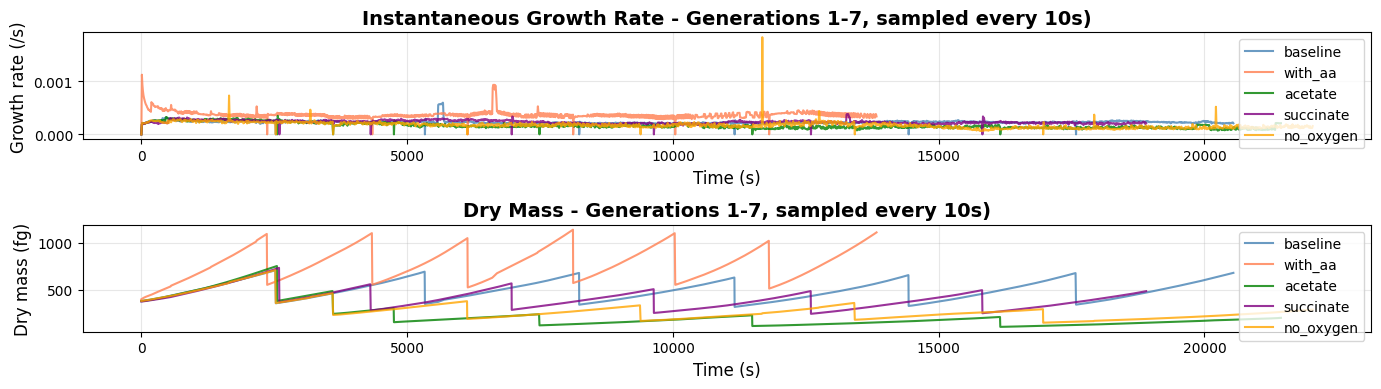


Summary Statistics - Generations 1-7

baseline:
  Total duration: 20544 s (342.4 min)
  Data points: 2058
  Generations: 7
  Growth rate: mean=0.000229 /s, std=0.000033 /s
  Dry mass: 380.0 → 678.6 fg (1.79x)

with_aa:
  Total duration: 13831 s (230.5 min)
  Data points: 1386
  Generations: 7
  Growth rate: mean=0.000371 /s, std=0.000071 /s
  Dry mass: 396.8 → 1109.6 fg (2.80x)

acetate:
  Total duration: 21439 s (357.3 min)
  Data points: 2147
  Generations: 7
  Growth rate: mean=0.000164 /s, std=0.000054 /s
  Dry mass: 377.2 → 199.4 fg (0.53x)

succinate:
  Total duration: 18903 s (315.1 min)
  Data points: 1894
  Generations: 7
  Growth rate: mean=0.000233 /s, std=0.000033 /s
  Dry mass: 373.3 → 483.3 fg (1.29x)

no_oxygen:
  Total duration: 22036 s (367.3 min)
  Data points: 2206
  Generations: 7
  Growth rate: mean=0.000173 /s, std=0.000062 /s
  Dry mass: 380.0 → 286.5 fg (0.75x)


In [20]:
# Example usage:

# Plot all 8 generations with continuous timeline (default 10s sampling)
data_all = plot_multi_generation_data(generations=range(1, 8))


# data_clean = plot_multi_generation_data(generations=range(1, 9), align_time=True, 
#                                         show_generation_markers=False)

## Gene knockouts

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

def plot_growth_data_general(generation=1, 
                              project_folder="gene_knockout_test",
                              variant_key="gene_knockout",
                              align_time=True, 
                              downsample_sec=None, 
                              show_legend=True, 
                              figsize=(14, 8)):
    """
    Plot growth rate and dry mass for all variants in a specific generation.
    Handles general metadata format where each variant index maps to a label (string or dict).
    
    Parameters:
    -----------
    generation : int
        Generation number to analyze (1-8)
    project_folder : str
        Path to the project output folder
    variant_key : str
        Key in metadata to look for variant information (e.g., "gene_knockout", "condition")
    align_time : bool
        If True, align all variants to start at time=0
        If False, use absolute timestamps from experiment start
    downsample_sec : int or None
        If specified, take only one data point every N seconds to reduce data density
        E.g., downsample_sec=10 means one point every 10 seconds
        If None, plot all data points
    show_legend : bool
        Whether to show legend on plots
    figsize : tuple
        Figure size (width, height)
    
    Returns:
    --------
    all_variants : dict
        Dictionary containing data for all variants
    
    Examples:
    ---------
    New metadata format:
    {"gene_knockout": {
        "0": "baseline", 
        "1": {"genes_to_knockout": ["EG10527_RNA"]}, 
        "2": {"genes_to_knockout": ["EG10528_RNA"]}
    }}
    
    Old metadata format:
    {"condition": {
        "0": {"condition": "minimal"}, 
        "1": {"condition": "minimal_plus_amino_acids"}
    }}
    """
    
    # Load condition metadata
    metadata_file = f"/user/home/il22158/work/vEcoli/out/{project_folder}/variant_sim_data/metadata.json"
    with open(metadata_file, 'r') as f:
        metadata = json.load(f)
    
    # Get the variant metadata dictionary
    if variant_key in metadata:
        variant_metadata = metadata[variant_key]
    else:
        print(f"Warning: '{variant_key}' not found in metadata. Available keys: {list(metadata.keys())}")
        variant_metadata = {}
    
    # Agent ID has number of zeros equal to generation number
    agent_id = "0" * generation
    
    # Base path template
    base_path = f"/user/home/il22158/work/vEcoli/out/{project_folder}/history/experiment_id={project_folder}/variant=0/lineage_seed=0/generation={generation}/agent_id={agent_id}"
    
    # Read all variants
    all_variants = {}
    variant_ids = sorted([int(k) for k in variant_metadata.keys()])
    
    for variant_id in variant_ids:
        # Update path for each variant
        history_folder = base_path.replace('/variant=0/', f'/variant={variant_id}/')
        
        # Get label from metadata - handle both string and dict formats
        variant_str = str(variant_id)
        if variant_str in variant_metadata:
            variant_info = variant_metadata[variant_str]
            
            # Convert to label string
            if isinstance(variant_info, str):
                # Direct string label (e.g., "baseline")
                label = variant_info
            elif isinstance(variant_info, dict):
                # Dictionary - convert to readable string
                if 'genes_to_knockout' in variant_info:
                    genes = variant_info['genes_to_knockout']
                    if genes:
                        label = f"KO: {', '.join(genes)}"
                    else:
                        label = "No knockout"
                elif 'condition' in variant_info:
                    label = variant_info['condition']
                else:
                    # Generic dict representation
                    label = str(variant_info)
            else:
                label = f"variant_{variant_id}"
        else:
            label = f"variant_{variant_id}"
        
        # Find all parquet files
        pq_files = sorted(glob.glob(f"{history_folder}/*.pq"))
        
        if len(pq_files) == 0:
            print(f"⚠ No files found for variant {variant_id} ({label})")
            continue
        
        print(f"✓ Variant {variant_id} ({label}): {len(pq_files)} files")
        
        # Read all files and concatenate
        all_data = []
        for pq_file in pq_files:
            df_temp = pd.read_parquet(pq_file)
            all_data.append(df_temp)
        
        df_variant = pd.concat(all_data, ignore_index=True)
        df_variant = df_variant.sort_values('time').reset_index(drop=True)
        
        # Get time array (aligned or absolute)
        if align_time:
            time_array = df_variant['time'].values - df_variant['time'].values[0]
        else:
            time_array = df_variant['time'].values
        
        growth_rate = df_variant['listeners__mass__instantaneous_growth_rate'].values
        dry_mass = df_variant['listeners__mass__dry_mass'].values
        
        # Apply downsampling if requested
        if downsample_sec is not None:
            # Create mask for points at every downsample_sec interval
            # Time step is 1 second, so we take every downsample_sec points
            indices = np.arange(0, len(time_array), downsample_sec)
            time_array = time_array[indices]
            growth_rate = growth_rate[indices]
            dry_mass = dry_mass[indices]
            print(f"  Downsampled to {len(time_array)} points (every {downsample_sec}s)")
        
        all_variants[variant_id] = {
            'label': label,
            'time': time_array,
            'growth_rate': growth_rate,
            'dry_mass': dry_mass
        }
    
    # Plot all variants
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    
    colors = plt.cm.tab10(np.linspace(0, 1, len(all_variants)))
    
    for idx, (variant_id, data) in enumerate(all_variants.items()):
        label = data['label']
        
        # Growth rate
        ax1.plot(data['time'], data['growth_rate'], 
                 linewidth=1.5, color=colors[idx], alpha=0.8, label=label)
        
        # Dry mass
        ax2.plot(data['time'], data['dry_mass'], 
                 linewidth=1.5, color=colors[idx], alpha=0.8, label=label)
    
    # Format plots
    time_mode = "Aligned" if align_time else "Absolute Time"
    if downsample_sec:
        time_mode += f" (every {downsample_sec}s)"
    
    ax1.set_xlabel('Time (s)', fontsize=12)
    ax1.set_ylabel('Growth rate (/s)', fontsize=12)
    ax1.set_title(f'Instantaneous Growth Rate - Generation {generation} ({time_mode})', 
                  fontsize=14, fontweight='bold')
    if show_legend:
        ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    ax2.set_xlabel('Time (s)', fontsize=12)
    ax2.set_ylabel('Dry mass (fg)', fontsize=12)
    ax2.set_title(f'Dry Mass - Generation {generation} ({time_mode})', 
                  fontsize=14, fontweight='bold')
    if show_legend:
        ax2.legend(loc='best', fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{'='*60}")
    print(f"Statistics - Generation {generation} ({'Aligned' if align_time else 'Absolute'})")
    print(f"{'='*60}")
    
    for variant_id, data in all_variants.items():
        label = data['label']
        print(f"\n{label} (variant {variant_id}):")
        print(f"  Duration: {data['time'][-1] - data['time'][0]:.0f} s ({(data['time'][-1] - data['time'][0])/60:.1f} min)")
        print(f"  Growth rate: mean={np.mean(data['growth_rate']):.6f} /s, std={np.std(data['growth_rate']):.6f} /s")
        print(f"  Dry mass: {data['dry_mass'][0]:.1f} → {data['dry_mass'][-1]:.1f} fg ({data['dry_mass'][-1]/data['dry_mass'][0]:.2f}x)")
    
    return all_variants


# Example usage for gene knockout experiment:
# data = plot_growth_data_general(
#     generation=1, 
#     project_folder="/user/home/il22158/work/vEcoli/out/gene_knockout_test",
#     variant_key="gene_knockout",
#     align_time=True, 
#     downsample_sec=10
# )

# For the old format with media conditions:
# data = plot_growth_data_general(
#     generation=1, 
#     project_folder="/user/home/il22158/work/vEcoli/out/some_other_sim",
#     variant_key="condition",
#     align_time=True, 
#     downsample_sec=10
# )

✓ Variant 0 (baseline): 7 files


  Downsampled to 253 points (every 10s)
✓ Variant 1 (KO: EG10527_RNA): 7 files
  Downsampled to 253 points (every 10s)
✓ Variant 2 (KO: EG10528_RNA): 7 files
  Downsampled to 253 points (every 10s)
✓ Variant 2 (KO: EG10528_RNA): 7 files
  Downsampled to 253 points (every 10s)
  Downsampled to 253 points (every 10s)


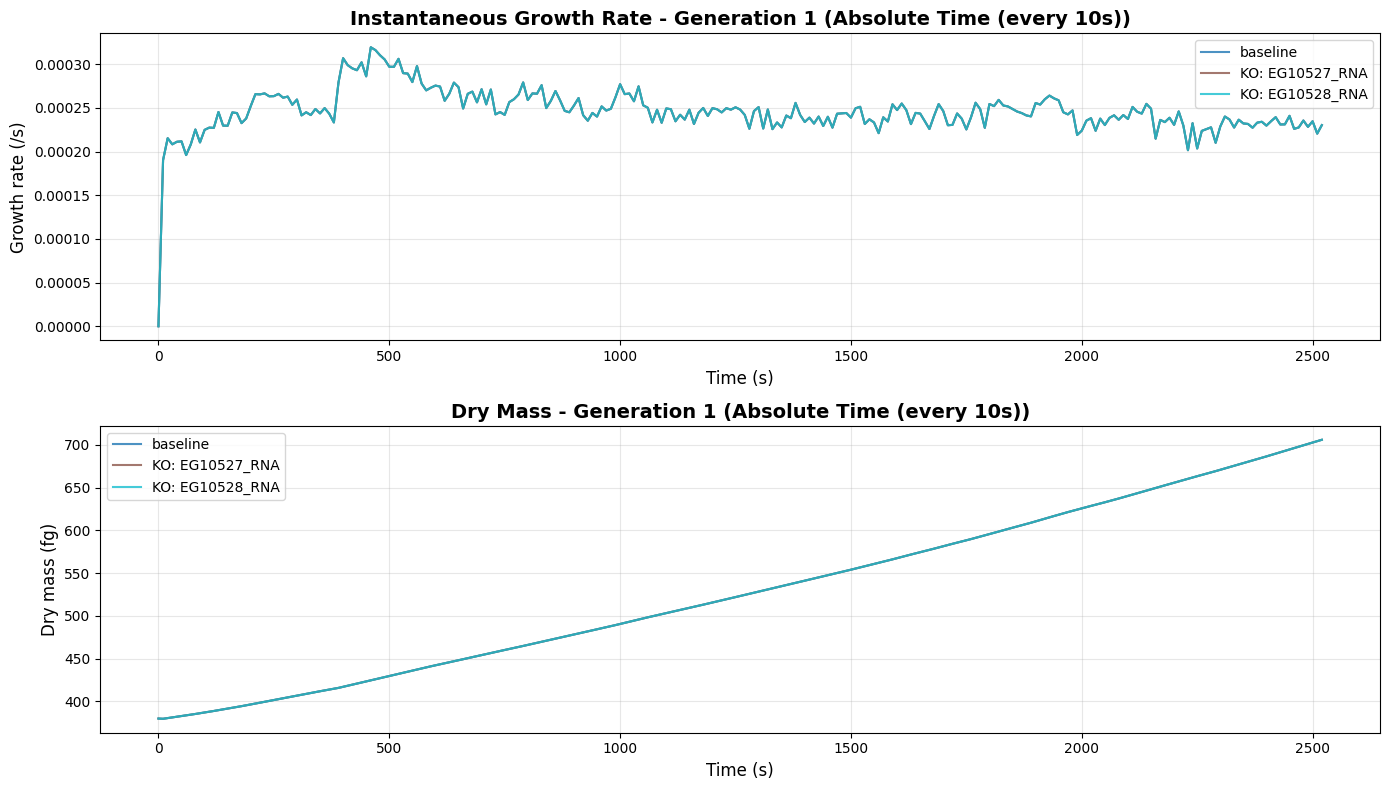


Statistics - Generation 1 (Absolute)

baseline (variant 0):
  Duration: 2520 s (42.0 min)
  Growth rate: mean=0.000246 /s, std=0.000026 /s
  Dry mass: 380.0 → 705.9 fg (1.86x)

KO: EG10527_RNA (variant 1):
  Duration: 2520 s (42.0 min)
  Growth rate: mean=0.000246 /s, std=0.000026 /s
  Dry mass: 380.0 → 705.9 fg (1.86x)

KO: EG10528_RNA (variant 2):
  Duration: 2520 s (42.0 min)
  Growth rate: mean=0.000246 /s, std=0.000026 /s
  Dry mass: 380.0 → 705.9 fg (1.86x)


In [13]:
# Generation 8 with aligned time, one point every 10 seconds
data_gen8_downsampled = plot_growth_data_general(generation=1, variant_key="gene_knockout", align_time=False, downsample_sec=10)

# Input

### Use the early classifed genes

In [2]:
import pandas as pd

# Load the Method 2 results
path = '/user/home/il22158/work/vEcoli/reading/results/'
genes_df = pd.read_csv(f'{path}metabolic_genes_method2.tsv', sep='\t')

# Divide into two groups
metabolic_genes = genes_df[genes_df['is_metabolic'] == True]
non_metabolic_genes = genes_df[genes_df['is_metabolic'] == False]

# Get gene IDs as lists
metabolic_gene_ids = metabolic_genes['id'].tolist()
non_metabolic_gene_ids = non_metabolic_genes['id'].tolist()

# Report lengths
print("="*60)
print("Gene Classification Summary (Method 2)")
print("="*60)
print(f"\nTotal genes analyzed: {len(genes_df)}")
print(f"Metabolic genes: {len(metabolic_gene_ids)}")
print(f"Non-metabolic genes: {len(non_metabolic_gene_ids)}")
print(f"Percentage metabolic: {100 * len(metabolic_gene_ids) / len(genes_df):.1f}%")

# Show sample genes from each group
print("\n" + "-"*60)
print("Sample Metabolic Genes (first 10):")
print("-"*60)
print(metabolic_genes[['id', 'symbol']].head(10).to_string(index=False))

print("\n" + "-"*60)
print("Sample Non-Metabolic Genes (first 10):")
print("-"*60)
print(non_metabolic_genes[['id', 'symbol']].head(10).to_string(index=False))

Gene Classification Summary (Method 2)

Total genes analyzed: 4747
Metabolic genes: 779
Non-metabolic genes: 3968
Percentage metabolic: 16.4%

------------------------------------------------------------
Sample Metabolic Genes (first 10):
------------------------------------------------------------
     id symbol
EG10003   cysZ
EG10006   dcuB
EG10013   mepM
EG10021   yjiA
EG10023   aceB
EG10025   aceF
EG10027   ackA
EG10028   pflA
EG10029    ada
EG10030    add

------------------------------------------------------------
Sample Non-Metabolic Genes (first 10):
------------------------------------------------------------
     id symbol
EG10001    alr
EG10002   modB
EG10004    dfp
EG10007   hisM
EG10008   zraS
EG10010   rhsE
EG10011   yaaA
EG10012   cydC
EG10014   acrD
EG10015   rodZ


In [3]:
import random
import pandas as pd

# Set random seed for reproducibility
random.seed(0)

# Randomly select 120 genes from each group
metabolic_sample = random.sample(metabolic_gene_ids, min(120, len(metabolic_gene_ids)))
non_metabolic_sample = random.sample(non_metabolic_gene_ids, min(120, len(non_metabolic_gene_ids)))

print("="*60)
print("Random Gene Selection")
print("="*60)
print(f"\nSelected {len(metabolic_sample)} metabolic genes")
print(f"Selected {len(non_metabolic_sample)} non-metabolic genes")

# Show first 10 from each sample
print("\n" + "-"*60)
print("Sample Metabolic Genes (first 10 of 120):")
print("-"*60)
print(metabolic_sample[:10])

print("\n" + "-"*60)
print("Sample Non-Metabolic Genes (first 10 of 120):")
print("-"*60)
print(non_metabolic_sample[:10])

Random Gene Selection

Selected 120 metabolic genes
Selected 120 non-metabolic genes

------------------------------------------------------------
Sample Metabolic Genes (first 10 of 120):
------------------------------------------------------------
['EG11920', 'M004', 'EG12144', 'EG10160', 'EG11343', 'EG13236', 'EG12544', 'EG12052', 'EG11497', 'EG12445']

------------------------------------------------------------
Sample Non-Metabolic Genes (first 10 of 120):
------------------------------------------------------------
['G6371', 'G6268', 'G6585', 'G7679', 'G7038', 'EG11936', 'EG10439', 'EG11750', 'G6119', 'EG10603']


In [4]:
metabolic_sample_RNA = list(map(lambda gene_id: f"{gene_id}_RNA", metabolic_sample))
non_metabolic_sample_RNA = list(map(lambda gene_id: f"{gene_id}_RNA", non_metabolic_sample))

# Show first 10 from each sample
print("\n" + "-"*60)
print("Sample Metabolic Genes (first 10 of 120):")
print("-"*60)
print(metabolic_sample_RNA[:10])

print("\n" + "-"*60)
print("Sample Non-Metabolic Genes (first 10 of 120):")
print("-"*60)
print(non_metabolic_sample_RNA[:10])


------------------------------------------------------------
Sample Metabolic Genes (first 10 of 120):
------------------------------------------------------------
['EG11920_RNA', 'M004_RNA', 'EG12144_RNA', 'EG10160_RNA', 'EG11343_RNA', 'EG13236_RNA', 'EG12544_RNA', 'EG12052_RNA', 'EG11497_RNA', 'EG12445_RNA']

------------------------------------------------------------
Sample Non-Metabolic Genes (first 10 of 120):
------------------------------------------------------------
['G6371_RNA', 'G6268_RNA', 'G6585_RNA', 'G7679_RNA', 'G7038_RNA', 'EG11936_RNA', 'EG10439_RNA', 'EG11750_RNA', 'G6119_RNA', 'EG10603_RNA']


In [15]:
path = "/user/home/il22158/work/vEcoli/reading/results/"
with open(path + 'metabolic_sample_RNA.txt', 'w') as f:
    for gene_id in metabolic_sample_RNA:
        f.write(f'["{gene_id}"],\n')
with open(path + 'non_metabolic_sample_RNA.txt', 'w') as f:    
    for gene_id in non_metabolic_sample_RNA:
        f.write(f'["{gene_id}"],\n')

### Design algorithm to classify genes linked with metabolic model or not

In [1]:
# Load genes.tsv
import pandas as pd

genes_df = pd.read_csv('/user/home/il22158/work/vEcoli/reconstruction/ecoli/flat/genes.tsv', 
                       sep='\t', comment='#')

# View structure
print(genes_df.head())
print(f"\nTotal genes: {len(genes_df)}")

# Search for specific genes
search_genes = ['lacA', 'lacI', 'lacY', 'lacZ']
results = genes_df[genes_df['symbol'].isin(search_genes)][['id', 'symbol', 'rna_ids']]

# Add BioCyc URLs
results['biocyc_url'] = results['id'].apply(
    lambda x: f"https://ecocyc.org/gene?orgid=ECOLI&id={x}"
)

print("\nGene lookup results:")
print(results)

# # To search by keyword in symbol
# keyword = 'lac'
# matches = genes_df[genes_df['symbol'].str.contains(keyword, case=False, na=False)]
# print(f"\nGenes containing '{keyword}':")
# print(matches[['id', 'symbol', 'rna_ids']].head(10))

        id symbol                                      synonyms  left_end_pos  \
0  EG10001    alr           ["alr", "alr5", "b4053", "ECK4045"]     4265782.0   
1  EG10002   modB  ["modB", "chlJ", "tslJ", "b0764", "ECK0753"]      795862.0   
2  EG10003   cysZ                  ["cysZ", "b2413", "ECK2408"]     2531463.0   
3  EG10004    dfp          ["dfp", "coaBC", "b3639", "ECK3629"]     3812731.0   
4  EG10006   dcuB          ["dcuB", "genF", "b4123", "ECK4116"]     4347404.0   

   right_end_pos direction          rna_ids  
0      4266861.0         +  ["EG10001_RNA"]  
1       796551.0         +  ["EG10002_RNA"]  
2      2532224.0         +  ["EG10003_RNA"]  
3      3813951.0         +  ["EG10004_RNA"]  
4      4348744.0         -  ["EG10006_RNA"]  

Total genes: 4747

Gene lookup results:
          id symbol          rna_ids  \
515  EG10524   lacA  ["EG10524_RNA"]   
516  EG10525   lacI  ["EG10525_RNA"]   
517  EG10526   lacY  ["EG10526_RNA"]   
518  EG10527   lacZ  ["EG10527_RNA"]

In [4]:
"""Test BioCyc API with credentials stored SECURELY"""
import requests
import os

# Load credentials from environment variables (NOT hardcoded)
BIOCYC_EMAIL = "il22158@bristol.ac.uk "
BIOCYC_PASSWORD = "Water999best!"

test_gene = "EG11555"
url = f"https://websvc.biocyc.org/getxml?ECOLI:{test_gene}"

# Attempt authentication
session = requests.Session()
session.auth = (BIOCYC_EMAIL, BIOCYC_PASSWORD)

response = session.get(url, timeout=10)
print(f"Status: {response.status_code}")
print(f"Response type: {'XML' if response.text.startswith('<?xml') else 'HTML'}")
print(response.text[:200])

Status: 200
Response type: HTML
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="en">


<title>Create Account</title>
<meta http-equiv="Content-Type" content="text/ht


In [24]:
"""Method 1: Search online database (BioCyc) - check all genes"""
import pandas as pd
import requests
from time import sleep

genes_df = pd.read_csv('/user/home/il22158/work/vEcoli/reconstruction/ecoli/flat/genes.tsv', 
                       sep='\t', comment='#')

def check_metabolic_biocyc(gene_id):
    """Query BioCyc API to check if gene is metabolic"""
    url = f"https://websvc.biocyc.org/getxml?ECOLI:{gene_id}"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            text = response.text.lower()
            metabolic_keywords = ['metabol']
            is_metabolic = any(kw in text for kw in metabolic_keywords)
            return is_metabolic
        return None
    except Exception as e:
        return None

# Check ALL genes
print(f"Checking {len(genes_df)} genes from BioCyc...")
results = []

# Demo test with shortened list
genes_df = genes_df.head(10)

for idx, gene in genes_df.iterrows():
    is_metabolic = check_metabolic_biocyc(gene['id'])
    results.append(is_metabolic)
    
    if (idx + 1) % 10 == 0:
        print(f"Processed {idx + 1}/{len(genes_df)} genes...")
    sleep(0.5)  # Be polite to server

genes_df['is_metabolic_biocyc'] = results

print(f"\nTotal metabolic genes (BioCyc): {genes_df['is_metabolic_biocyc'].sum()}")
print("\nSample metabolic genes:")
print(genes_df[genes_df['is_metabolic_biocyc'] == True][['id', 'symbol', 'rna_ids']].head(10))

Checking 4747 genes from BioCyc...
Processed 10/10 genes...

Total metabolic genes (BioCyc): 10

Sample metabolic genes:
        id symbol          rna_ids
0  EG10001    alr  ["EG10001_RNA"]
1  EG10002   modB  ["EG10002_RNA"]
2  EG10003   cysZ  ["EG10003_RNA"]
3  EG10004    dfp  ["EG10004_RNA"]
4  EG10006   dcuB  ["EG10006_RNA"]
5  EG10007   hisM  ["EG10007_RNA"]
6  EG10008   zraS  ["EG10008_RNA"]
7  EG10010   rhsE  ["EG10010_RNA"]
8  EG10011   yaaA  ["EG10011_RNA"]
9  EG10012   cydC  ["EG10012_RNA"]


In [2]:
"""Method 1 with save"""
import pandas as pd
import requests
from time import sleep

genes_df = pd.read_csv('/user/home/il22158/work/vEcoli/reconstruction/ecoli/flat/genes.tsv', 
                       sep='\t', comment='#')

def check_metabolic_biocyc(gene_id):
    """Query BioCyc API to check if gene is metabolic"""
    url = f"https://websvc.biocyc.org/getxml?ECOLI:{gene_id}"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            text = response.text.lower()
            print(text)
            metabolic_keywords = ['metabol']
            is_metabolic = any(kw in text for kw in metabolic_keywords)
            # Print matching sentences for verification
            if is_metabolic:
                lines = text.split('\n')
                matches = [line.strip() for line in lines if 'metabol' in line]
                if matches:
                    print(f"\n{gene_id} - Found 'metabol' in {len(matches)} lines:")
                    for match in matches[:3]:  # Show first 3 matches
                        print(f"  {match[:150]}...") 
            return is_metabolic
        return None
    except Exception as e:
        return None

# Check genes (shortened for demo)
genes_df1 = genes_df.head(1).copy() 
print(f"Checking {len(genes_df1)} genes from BioCyc (demo)...")
results = []

for idx, gene in genes_df1.iterrows():
    is_metabolic = check_metabolic_biocyc(gene['id'])
    results.append(is_metabolic if is_metabolic is not None else False)
    
    if (idx + 1) % 10 == 0:
        print(f"Processed {idx + 1}/{len(genes_df1)} genes...")
    sleep(0.5)

genes_df1['is_metabolic_biocyc'] = results

# Merge results back to full dataframe
genes_df['is_metabolic_biocyc'] = False  # Initialize all as False
genes_df.loc[genes_df['id'].isin(genes_df1['id']), 'is_metabolic_biocyc'] = genes_df1['is_metabolic_biocyc'].values

# Save
path = '/user/home/il22158/work/vEcoli/reading/'
genes_df.to_csv(f'{path}metabolic_genes_method1.tsv', sep='\t', index=False)

print(f"\n✓ Saved to {path}metabolic_genes_method1.tsv")
print(f"Total: {len(genes_df)} genes | Metabolic: {genes_df['is_metabolic_biocyc'].sum()}")

# Verify reload
test_df = pd.read_csv(f'{path}metabolic_genes_method1.tsv', sep='\t')
print(f"✓ Verified reload: {len(test_df)} genes, {test_df['is_metabolic_biocyc'].sum()} metabolic")
print("\nSample metabolic genes:")
print(test_df[test_df['is_metabolic_biocyc']][['id', 'symbol']].head(5))

Checking 1 genes from BioCyc (demo)...
<!doctype html public "-//w3c//dtd html 4.01 transitional//en" "http://www.w3.org/tr/html4/loose.dtd">
<html lang="en">


<title>create account</title>
<meta http-equiv="content-type" content="text/html; charset=utf-8">

<script src="https://code.jquery.com/jquery-3.5.1.min.js"></script>
<script src="https://code.jquery.com/jquery-migrate-3.3.2.min.js"></script>
<script>
var $j = jquery.noconflict();
</script>

<!-- 
<link rel="stylesheet" type="text/css" href="/yui/build/assets/skins/sam/skin.css"> 
<link rel="stylesheet" type="text/css" href="/style.css" >

user web site style sheet customization should use the following file:
<link rel="stylesheet" type="text/css" href="/userwebsitecustomization.css">

the previous 4 .css files are combined at web start up time by the lisp fn publish-combined-static-files generating the following combined.css file. 
-->
<!--    <link rel="stylesheet" href="/pure/pure.css" type="text/css"> -->
<link rel="stylesh

In [12]:
"""Method 2 Preparation1: Check sim_data metabolism category"""
import pickle

kb_path = '/user/home/il22158/work/vEcoli/out/all_media_conditions_test/parca/kb/simData.cPickle'
with open(kb_path, 'rb') as f:
    sim_data = pickle.load(f)

if hasattr(sim_data.process, 'metabolism'):
    metabolism = sim_data.process.metabolism
    # Find all attributes ending with 'ids'
    id_attrs = [attr for attr in dir(metabolism) if attr.endswith('ids') and not attr.startswith('_')]
    for attr in id_attrs:
        ids = getattr(metabolism, attr)
        print(f"{attr}: {len(ids)} IDs; Sample: {ids[:5]}")

base_reaction_ids: 2820 IDs; Sample: ['1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN', '1.1.1.127-RXN', '1.1.1.215-RXN', '1.1.1.251-RXN', '1.1.1.271-RXN']
catalyst_ids: 1562 IDs; Sample: ['1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]', '1-PFK[c]', '2-DEHYDROPANTOATE-REDUCT-MONOMER[c]', '2-ISOPROPYLMALATESYN-MONOMER[c]', '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]']


In [13]:
"""Method 2 Preparation 2: Load simulation data and compare gene IDs"""
# Check ID format comparison
import pickle
import pandas as pd

kb_path = '/user/home/il22158/work/vEcoli/out/all_media_conditions_test/parca/kb/simData.cPickle'
with open(kb_path, 'rb') as f:
    sim_data = pickle.load(f)

genes_df = pd.read_csv('/user/home/il22158/work/vEcoli/reconstruction/ecoli/flat/genes.tsv', 
                       sep='\t', comment='#')

# Get metabolic gene IDs from sim_data
metabolic_genes = metabolism.catalyst_ids

print("Sample metabolic gene IDs from sim_data:")
print(metabolic_genes[:10])

print("\nSample gene IDs from genes.tsv:")
print(genes_df['id'].head().tolist())

Sample metabolic gene IDs from sim_data:
['1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]', '1-PFK[c]', '2-DEHYDROPANTOATE-REDUCT-MONOMER[c]', '2-ISOPROPYLMALATESYN-MONOMER[c]', '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]', '2OXOGLUTARATEDEH-CPLX[c]', '3-ISOPROPYLMALDEHYDROG-CPLX[c]', '3-ISOPROPYLMALISOM-CPLX[c]', '3-METHYL-2-OXOBUT-OHCH3XFER-CPLX[c]', '3-OXOACYL-ACP-SYNTHII-CPLX[c]']

Sample gene IDs from genes.tsv:
['EG10001', 'EG10002', 'EG10003', 'EG10004', 'EG10006']


- Principle of method 2:

The metabolism process (submodel) uses enzyme catalysts to set reaction bounds. A mutation in a gene encoding these enzymes DIRECTLY affects metabolic flux by setting reaction upper bounds to zero when the enzyme is absent (catalysis_matrix.dot(catalyst_counts) == 0).

- Why use rnas.tsv: 
Mapping the relationship from database

Gene (EG10001) 

  ↓ transcription

RNA (EG10001_RNA)  ← rnas.tsv links these three!

  ↓ translation
  
Protein (ALARACEBIOSYN-MONOMER)

In [16]:
"""Method 2: Map metabolism catalyst enzymes to genes (using rnas.tsv)"""
import pickle
import pandas as pd

# Load sim_data
kb_path = '/user/home/il22158/work/vEcoli/out/all_media_conditions_test/parca/kb/simData.cPickle'
with open(kb_path, 'rb') as f:
    sim_data = pickle.load(f)

# Load genes and RNAs
genes_df = pd.read_csv('/user/home/il22158/work/vEcoli/reconstruction/ecoli/flat/genes.tsv', 
                       sep='\t', comment='#')
rnas_df = pd.read_csv('/user/home/il22158/work/vEcoli/reconstruction/ecoli/flat/rnas.tsv',
                      sep='\t', comment='#')

# Step 1: Get catalyst protein IDs from metabolism (shortened for demo)
catalyst_ids = sim_data.process.metabolism.catalyst_ids[:10]
print("Step 1: Catalyst IDs from metabolism")
print(catalyst_ids)
print(f"Total catalysts: {len(sim_data.process.metabolism.catalyst_ids)}\n")

# Step 2: Strip compartment suffixes [c], [i], [p], etc.
catalyst_monomers = [cat.split('[')[0] for cat in catalyst_ids]
print("Step 2: Strip compartment tags")
print(catalyst_monomers)
print()

# Step 3: Map monomers to gene IDs using rnas.tsv
# Parse monomer_ids column (it's a string representation of a list)
import ast
rnas_df['monomer_ids_parsed'] = rnas_df['monomer_ids'].apply(ast.literal_eval)

# Create monomer to gene mapping
monomer_to_gene = {}
for _, row in rnas_df.iterrows():
    for monomer in row['monomer_ids_parsed']:
        monomer_to_gene[monomer] = row['gene_id']

metabolic_gene_ids = [
    monomer_to_gene.get(mono, 'NOT_FOUND') for mono in catalyst_monomers
]
print("Step 3: Map monomers → genes (using rnas.tsv)")
for mono, gene in zip(catalyst_monomers[:10], metabolic_gene_ids[:10]):
    print(f"  {mono} → {gene}")
print()

# Step 4: Match converted IDs with genes.tsv for demo sample
print("Step 4: Verify gene IDs exist in genes.tsv (demo sample)")
sample_matches = genes_df[genes_df['id'].isin(metabolic_gene_ids)][['id', 'symbol']]
print(sample_matches)
print(f"Matched {len(sample_matches)} out of {len([g for g in metabolic_gene_ids if g != 'NOT_FOUND'])} genes\n")

# Step 5: Apply to full dataset
# print("Step 5: Apply to FULL catalyst set")
# all_catalyst_monomers = set([cat.split('[')[0] for cat in sim_data.process.metabolism.catalyst_ids])
# all_metabolic_gene_ids = set([
#     monomer_to_gene[mono] for mono in all_catalyst_monomers 
#     if mono in monomer_to_gene
# ])

# genes_df['is_metabolic'] = genes_df['id'].isin(all_metabolic_gene_ids)

# print(f"Total metabolic catalyst genes: {genes_df['is_metabolic'].sum()}")
# print(f"Out of {len(genes_df)} total genes ({100*genes_df['is_metabolic'].sum()/len(genes_df):.1f}%)")
# print(f"Catalysts not mapped: {len([m for m in all_catalyst_monomers if m not in monomer_to_gene])}")
# print("\nFirst 10 metabolic genes:")
# print(genes_df[genes_df['is_metabolic']][['id', 'symbol']].head(10))

Step 1: Catalyst IDs from metabolism
['1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]', '1-PFK[c]', '2-DEHYDROPANTOATE-REDUCT-MONOMER[c]', '2-ISOPROPYLMALATESYN-MONOMER[c]', '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]', '2OXOGLUTARATEDEH-CPLX[c]', '3-ISOPROPYLMALDEHYDROG-CPLX[c]', '3-ISOPROPYLMALISOM-CPLX[c]', '3-METHYL-2-OXOBUT-OHCH3XFER-CPLX[c]', '3-OXOACYL-ACP-SYNTHII-CPLX[c]']
Total catalysts: 1562

Step 2: Strip compartment tags
['1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER', '1-PFK', '2-DEHYDROPANTOATE-REDUCT-MONOMER', '2-ISOPROPYLMALATESYN-MONOMER', '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER', '2OXOGLUTARATEDEH-CPLX', '3-ISOPROPYLMALDEHYDROG-CPLX', '3-ISOPROPYLMALISOM-CPLX', '3-METHYL-2-OXOBUT-OHCH3XFER-CPLX', '3-OXOACYL-ACP-SYNTHII-CPLX']

Step 3: Map monomers → genes (using rnas.tsv)
  1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER → EG11377
  1-PFK → NOT_FOUND
  2-DEHYDROPANTOATE-REDUCT-MONOMER → G6239
  2-ISOPROPYLMALATESYN-MONOMER → EG11226
  2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER → EG1

In [22]:
"""Method 2 save - all genes marked"""
import pickle
import pandas as pd
import ast

# Load data
kb_path = '/user/home/il22158/work/vEcoli/out/all_media_conditions_test/parca/kb/simData.cPickle'
with open(kb_path, 'rb') as f:
    sim_data = pickle.load(f)

# Load FULL genes.tsv (not shortened)
genes_df_full = pd.read_csv('/user/home/il22158/work/vEcoli/reconstruction/ecoli/flat/genes.tsv', 
                             sep='\t', comment='#')
# shortened for demo
genes_df_full = genes_df_full[10:20]
rnas_df = pd.read_csv('/user/home/il22158/work/vEcoli/reconstruction/ecoli/flat/rnas.tsv',
                      sep='\t', comment='#')

# Build monomer to gene mapping
rnas_df['monomer_ids_parsed'] = rnas_df['monomer_ids'].apply(ast.literal_eval)
monomer_to_gene = {}
for _, row in rnas_df.iterrows():
    for monomer in row['monomer_ids_parsed']:
        monomer_to_gene[monomer] = row['gene_id']

# Get all metabolic genes
all_catalyst_monomers = set([cat.split('[')[0] for cat in sim_data.process.metabolism.catalyst_ids])
all_metabolic_gene_ids = set([
    monomer_to_gene[mono] for mono in all_catalyst_monomers 
    if mono in monomer_to_gene
])

# Mark ALL genes as metabolic or not
genes_df_full['is_metabolic'] = genes_df_full['id'].isin(all_metabolic_gene_ids)

# Save
path = '/user/home/il22158/work/vEcoli/reading/'
genes_df_full.to_csv(f'{path}metabolic_genes_method2.tsv', sep='\t', index=False)
print(f"Saved Method 2 results to {path}metabolic_genes_method2.tsv")
print(f"Total genes: {len(genes_df_full)}")
print(f"Metabolic genes: {genes_df_full['is_metabolic'].sum()} ({100*genes_df_full['is_metabolic'].sum()/len(genes_df_full):.1f}%)")
print(f"Non-metabolic genes: {(~genes_df_full['is_metabolic']).sum()}")
print(f"Catalysts not mapped: {len([m for m in all_catalyst_monomers if m not in monomer_to_gene])}")

# Test: reload and verify
test_df = pd.read_csv(f'{path}metabolic_genes_method2.tsv', sep='\t')
print(f"\n✓ Verified: Reloaded {len(test_df)} genes (same as original {len(genes_df_full)})")
print(f"  Metabolic: {test_df['is_metabolic'].sum()}")
print(f"  Non-metabolic: {(~test_df['is_metabolic']).sum()}")
print("\nSample metabolic genes:")
print(test_df[test_df['is_metabolic']][['id', 'symbol']].head(5))

Saved Method 2 results to /user/home/il22158/work/vEcoli/reading/metabolic_genes_method2.tsv
Total genes: 10
Metabolic genes: 3 (30.0%)
Non-metabolic genes: 7
Catalysts not mapped: 783

✓ Verified: Reloaded 10 genes (same as original 10)
  Metabolic: 3
  Non-metabolic: 7

Sample metabolic genes:
        id symbol
0  EG10013   mepM
7  EG10021   yjiA
9  EG10023   aceB


# Sim_data (pre-calculated parameters)

In [4]:
import pickle
import os

# Read ParCa kb simData
kb_path = '/user/home/il22158/work/vEcoli/out/all_media_conditions_test/parca/kb/simData.cPickle'
with open(kb_path, 'rb') as f:
    kb_sim_data = pickle.load(f)

print("=== ParCa KB simData ===")
print(f"Type: {type(kb_sim_data)}")
print(f"Attributes: {dir(kb_sim_data)}")

=== ParCa KB simData ===
Type: <class 'reconstruction.ecoli.simulation_data.SimulationDataEcoli'>
Attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_base_codes', '_add_compartment_keys', '_add_condition_data', '_add_molecular_weight_keys', 'adjust_final_expression', 'adjust_new_gene_final_expression', 'adjustments', 'amino_acid_code_to_id_ordered', 'basal_expression_condition', 'calculate_ppgpp_expression', 'common_names', 'compartment_abbrev_to_id', 'compartment_abbrev_to_index', 'compartment_id_to_index', 'condition', 'condition_active_tfs', 'condition_inactive_tfs', 'condition_to_doubling_time', 'conditions', 'constants', 'dntp_code_to_id_ordered', 'doubling_ti

In [ ]:
# Check for metabolic matrix related attributes
metabolic_attrs = [attr for attr in dir(kb_sim_data) if 'metabol' in attr.lower() or 'matrix' in attr.lower() or 'stoich' in attr.lower()]
print(f"\nMetabolic/Matrix related attributes: {metabolic_attrs}")
# Check process attribute

if hasattr(kb_sim_data, 'process'):
    print(f"\nProcess attributes: {dir(kb_sim_data.process)}")
    
    # Check for metabolism
    if hasattr(kb_sim_data.process, 'metabolism'):
        print(f"\nMetabolism attributes: {dir(kb_sim_data.process.metabolism)}")


Metabolic/Matrix related attributes: []

Process attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'chromosome_structure', 'complexation', 'equilibrium', 'metabolism', 'replication', 'rna_decay', 'transcription', 'transcription_regulation', 'translation', 'two_component_system']

Metabolism attributes: ['KI_aa_synthesis', 'KM_aa_export', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclass

In [3]:
# Read variant sim_data files
variant_dir = '/user/home/il22158/work/vEcoli/out/all_media_conditions_test/variant_sim_data'
pickle_files = sorted([f for f in os.listdir(variant_dir) if f.endswith('.cPickle')])

print(f"\n=== Found {len(pickle_files)} variant files ===")

for pfile in pickle_files:
    variant_path = os.path.join(variant_dir, pfile)
    with open(variant_path, 'rb') as f:
        variant_sim_data = pickle.load(f)
    
    print(f"\n{pfile}: -> Full path: {variant_path}")
    print(f"  Condition: {variant_sim_data.condition}")
    if hasattr(variant_sim_data, 'genetic_perturbations'):
        print(f"  Genetic perturbations: {variant_sim_data.genetic_perturbations}")


=== Found 6 variant files ===

0.cPickle: -> Full path: /user/home/il22158/work/vEcoli/out/all_media_conditions_test/variant_sim_data/0.cPickle
  Condition: basal

1.cPickle: -> Full path: /user/home/il22158/work/vEcoli/out/all_media_conditions_test/variant_sim_data/1.cPickle
  Condition: basal

2.cPickle: -> Full path: /user/home/il22158/work/vEcoli/out/all_media_conditions_test/variant_sim_data/2.cPickle
  Condition: with_aa

3.cPickle: -> Full path: /user/home/il22158/work/vEcoli/out/all_media_conditions_test/variant_sim_data/3.cPickle
  Condition: acetate

4.cPickle: -> Full path: /user/home/il22158/work/vEcoli/out/all_media_conditions_test/variant_sim_data/4.cPickle
  Condition: succinate

5.cPickle: -> Full path: /user/home/il22158/work/vEcoli/out/all_media_conditions_test/variant_sim_data/5.cPickle
  Condition: no_oxygen
